In [1]:
%matplotlib inline
import h2o
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from h2o.estimators import H2OGradientBoostingEstimator, H2ORandomForestEstimator, H2OXGBoostEstimator, H2ODeepLearningEstimator
from h2o.automl import H2OAutoML
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

In [67]:
h2o.init(nthreads = 2, max_mem_size = 12)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from F:\anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\gaurang\AppData\Local\Temp\tmp2jdu08pl
  JVM stdout: C:\Users\gaurang\AppData\Local\Temp\tmp2jdu08pl\h2o_Gaurang_Davda_started_from_python.out
  JVM stderr: C:\Users\gaurang\AppData\Local\Temp\tmp2jdu08pl\h2o_Gaurang_Davda_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.9
H2O cluster version age:,27 days
H2O cluster name:,H2O_from_python_Gaurang_Davda_l459t3
H2O cluster total nodes:,1
H2O cluster free memory:,10.67 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [82]:
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.T

,0,1,2,3,4,5,6,7,8,9,...,45456,45457,45458,45459,45460,45461,45462,45463,45464,45465
adult,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path':...",NaN,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_pa...",NaN,NaN,NaN,NaN,"{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORp...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,...,0,0,0,0,0,0,0,0,0,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id':...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id':...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'...",...,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'name': 'Mystery'}, {'...","[{'id': 9648, 'name': 'Mystery'}, {'id': 27, 'name': 'Horror'}]","[{'id': 27, 'name': 'Horror'}]","[{'id': 878, 'name': 'Science Fiction'}]","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name': 'Action'}, {'id':...","[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]","[{'id': 18, 'name': 'Drama'}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}, {'id':...",[],[]
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.mgm.com/view/movie/757/Goldeneye/,...,NaN,NaN,NaN,NaN,NaN,http://www.imdb.com/title/tt6209470/,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041,tt0113277,tt0114319,tt0112302,tt0114576,tt0113189,...,tt0038621,tt0265736,tt0252966,tt0112613,tt0102797,tt6209470,tt2028550,tt0303758,tt0008536,tt6980792
original_language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,fa,tl,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,House of Horrors,Shadow of the Blair Witch,The Burkittsville 7,Caged Heat 3000,Robin Hood,رگ خواب,Siglo ng Pagluluwal,Betrayal,Satana likuyushchiy,Queerama
overview,"Led by Woody, Andy's toys live happily in his room until Andy's bi...",When siblings Judy and Peter discover an enchanted board game that...,A family wedding reignites the ancient feud between next-door neig...,"Cheated on, mistreated and stepped on, the women are holding their...","Just when George Banks has recovered from his daughter's wedding, ...","Obsessive master thief, Neil McCauley leads a top-notch crew on va...","An ugly duckling having undergone a remarkable change, still harbo...","A mischievous young boy, Tom Sawyer, witnesses a murder by the dea...",International action superstar Jean Claude Van Damme teams with Po...,James Bond must unmask the mysterious head of the Janus Syndicate ...,...,"An unsuccessful sculptor saves a madman named ""The Creeper"" from d...","In this true-crime documentary, we delve into the murder spree tha...","A film archivist revisits the story of Rustin Parr, a hermit thoug...",It's the year 3000 AD. The world's most dangerous women are banish...,"Yet another version of the classic epic, with enough variation to ...",Rising and falling between a man and woman.,An artist struggles to finish his work while a storyline about a c...,"When one of her hits goes wrong, a prof

### Columns

* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

In [8]:
df.shape

(45466, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [10]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [83]:
df = df.drop(['imdb_id'], axis=1)

In [84]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [85]:
df = df.drop('original_title', axis=1)

We see that the majority of the movies have a recorded revenue of **0**. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will still use revenue as an extremely important feature going forward from the remaining 7000 moves.

In [87]:
df[df['revenue'] == 0].shape

(38052, 22)

In [86]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

As we move forward trying to answer certain questions, we will have to construct several features suitable for that particular query. For now, we will construct two very important features:
* **year:** The year in which the movie was released.
* **return:** The ratio of revenue to budget.

The **return** feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a \$200 million budget movie that earned \$100 million did better than a \$50,000 budget movie taking in \$200,000. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [88]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(36576, 23)

In [89]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

There are close to **0 adult movies** in this dataset. The **adult** feature therefore is not of much use to us and can be safely dropped.

In [90]:
df = df.drop('adult', axis=1)

## Exploratory Data Analysis

In [91]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [92]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

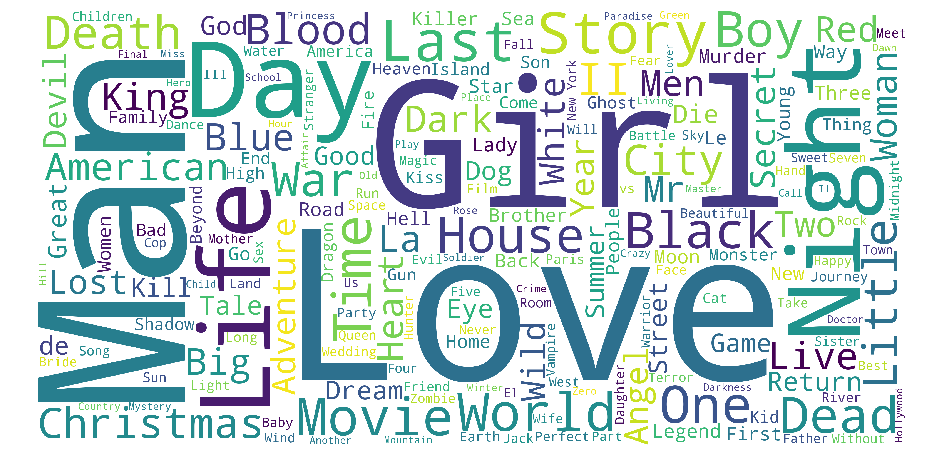

In [21]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

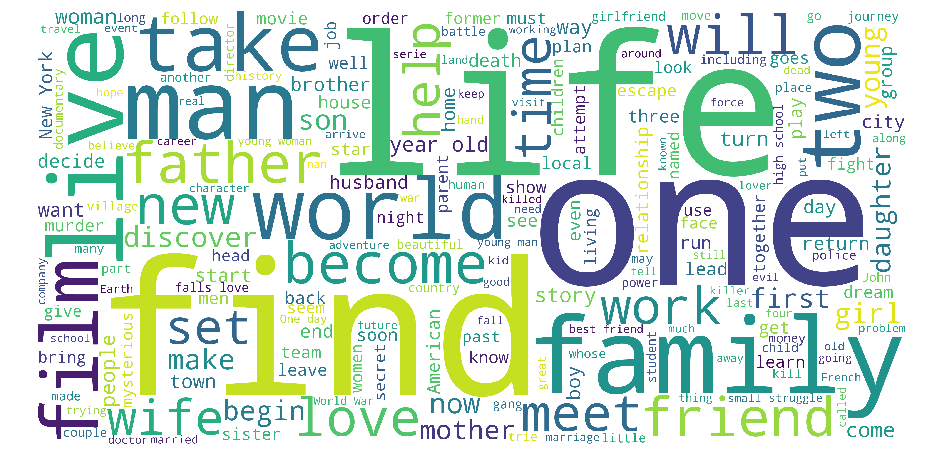

In [22]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

## Franchise Movies

In [93]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

F:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [94]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [25]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,6,6.151784e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [26]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
112,Avatar Collection,2,1.393983e+09,2.787965e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1457,The Secret Life of Pets Collection,1,8.754579e+08,8.754579e+08
1550,Transformers Collection,5,8.732202e+08,4.366101e+09


## Production Companies

In [95]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [96]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [97]:
com_df = df.drop('production_companies', axis=1).join(s)

In [98]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']
com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [31]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,5.082015e+07,1250
Universal Pictures,5.525919e+10,6.657734e+07,830
Paramount Pictures,4.880819e+10,4.866221e+07,1003
Twentieth Century Fox Film Corporation,4.768775e+10,5.704276e+07,836
Walt Disney Pictures,4.083727e+10,1.552748e+08,263
Columbia Pictures,3.227974e+10,7.489498e+07,431
New Line Cinema,2.217339e+10,8.004834e+07,277
Amblin Entertainment,1.734372e+10,2.282068e+08,76
DreamWorks SKG,1.547575e+10,1.629027e+08,95
Dune Entertainment,1.500379e+10,2.308275e+08,65


### Popularity, Vote Average and Vote Count

In this section, we will work with metrics provided to us by TMDB users. We will try to gain a deeper understanding of the popularity, vote average and vote count features and try and deduce any relationships between them as well as other numeric features such as budget and revenue.

In [99]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [100]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [34]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

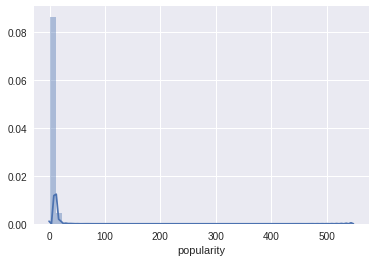

In [35]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

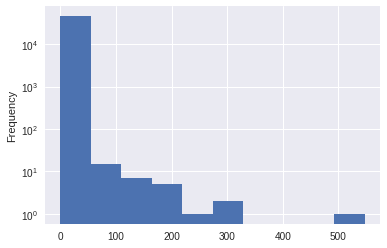

In [36]:
df['popularity'].plot(logy=True, kind='hist')

The Popularity score seems to be an extremely skewed quentity with a mean of only **2.9** but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

In [37]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [38]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


**The Shawshank Redemption** and **The Godfather** are the two most critically acclaimed movies in the TMDB Database. Interestingly, they are the top 2 movies in IMDB's Top 250 Movies list too. They have a rating of over 9 on IMDB as compared to their 8.5 TMDB Scores.

In [101]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [102]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
    
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [103]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



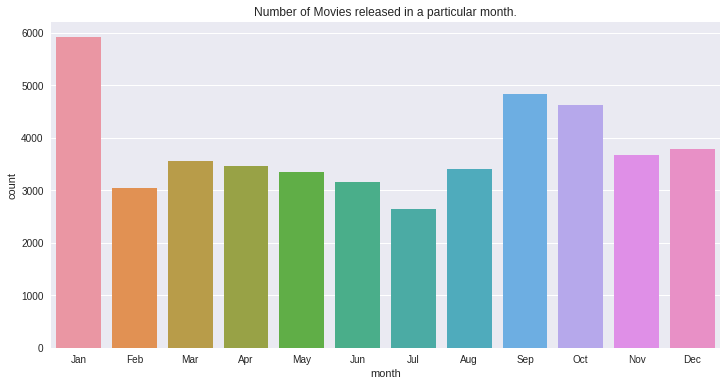

In [42]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

It appears that **January** is the most popular month when it comes to movie releases. In Hollywood circles, this is also known as the *the dump month* when sub par movies are released by the dozen. 

In which months do bockbuster movies tend to release? To answer this question, we will consider all movies that have made in excess of 100 million dollars and calculate the average gross for each month.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



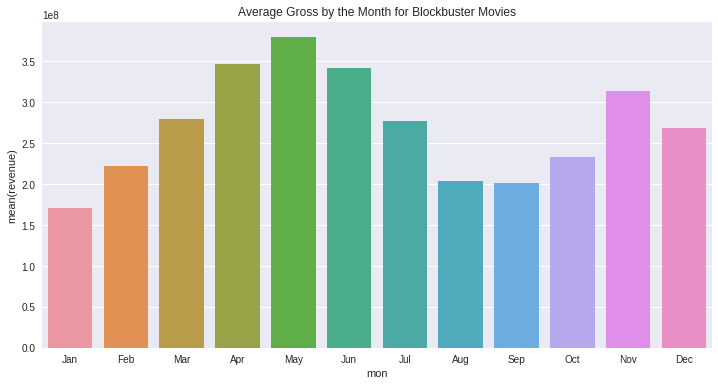

In [43]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

We see that the months of **April**, **May** and **June** have the highest average gross among high grossing movies. This can be attributed to the fact that blockbuster movies are usually released in the summer when the kids are out of school and the parents are on vacation and therefore, the audience is more likely to spend their disposable income on entertainment.

Do some months tend to be more successful than others? Let us visualise the boxplot between the return and the months.

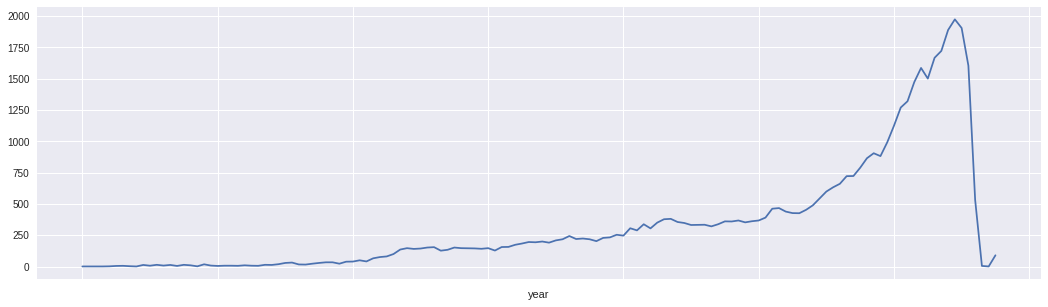

In [44]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

We notice that there is a sharp rise in the number of movies **starting the 1990s decade.** However, we will not look too much into this as it is entirely possible that recent movies were oversampled for the purposes of this dataset.

### Spoken Languages

Does the number of spoken languages influence the success of a movie? To do this, we will convert our **spoken_languages** feature to a numeric feature denoting the number of languages spoken in that film.

In [104]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [26]:
df['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
19        1
13        1
12        1
10        1
Name: spoken_languages, dtype: int64

Most movies have just one language spoken in the entire duration of the film. **19** is the higest number of languages spoken in a film.

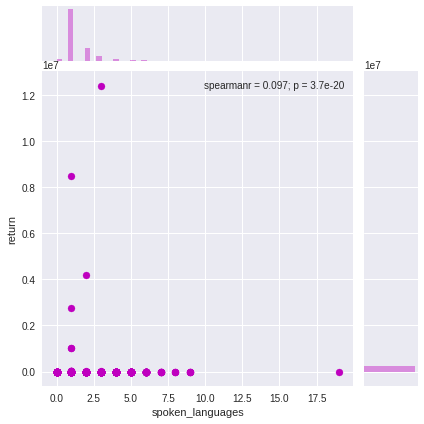

In [47]:
sns.jointplot(x="spoken_languages", y="return", data=df, stat_func=stats.spearmanr, color="m")

The **Spearman Coefficient** is 0.097 indicating no correlation between the two quantities.

Is there any meaningful relationship between runtime and return? Let us find out!

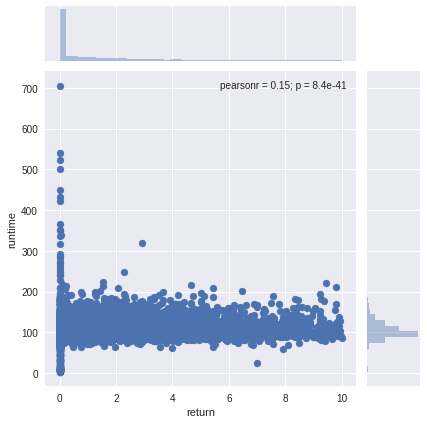

In [48]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

There seems to be no relationship between the two quantities. **The duration of a movie is independent of its success.** However, I have a feeling this might not be the case with duration and budget. A longer movie should entail a higher budget. Let us find out if this is really the case.

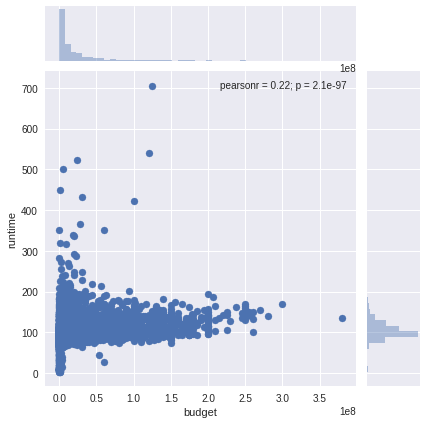

In [49]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

The two quantities have a much weaker correlation than I had expected. In retrospect, the genre of the movie tends to have a much greater impact on budget. A 3 hour art film will cost significantly lesser than a 90 minute Sci-Fi movie. 


How strong a correlation does the budget hold with the revenue? A stronger correlation would directly imply more accurate forecasts.

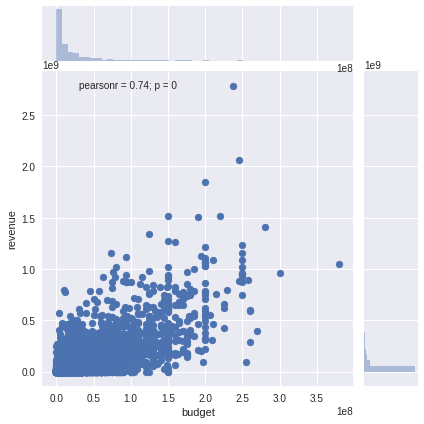

In [50]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

The pearson r value of **0.74** between the two quantities indicates a very strong correlation. 

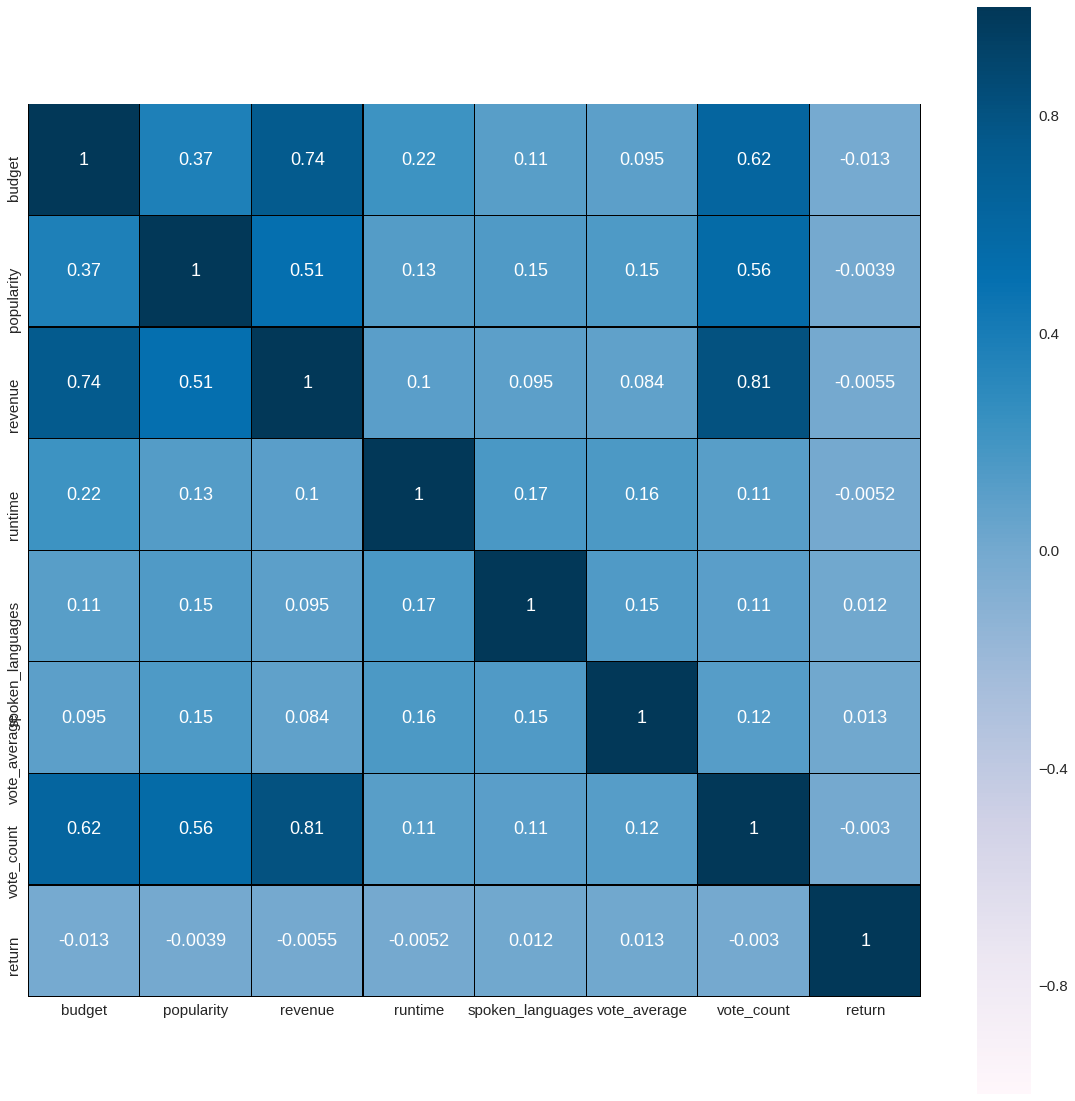

In [51]:
sns.set(font_scale=1.5)
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr,linewidths=0.25,vmax=1.0, cmap = 'PuBu', linecolor='black', square=True, annot=True)

**The correlation matrix shows that budget, popularity and vote count are the features most correlated to revenue**

In [105]:
ddf = df.copy()

In [106]:
ddf['genres'] = ddf['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [107]:
s = ddf.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [108]:
gen_ddf = ddf.drop('genres', axis=1).join(s)

In [109]:
gen_ddf['genre'].value_counts().shape[0]

32

TMDB defines 32 different genres for our set of 45,000 movies. Let us now have a look at the most commonly occuring genres in movies.

In [110]:
gen_ddf['genre']

0              Animation
0                 Comedy
0                 Family
1              Adventure
1                Fantasy
1                 Family
2                Romance
2                 Comedy
3                 Comedy
3                  Drama
3                Romance
4                 Comedy
5                 Action
5                  Crime
5                  Drama
5               Thriller
6                 Comedy
6                Romance
7                 Action
7              Adventure
7                  Drama
7                 Family
8                 Action
8              Adventure
8               Thriller
9              Adventure
9                 Action
9               Thriller
10                Comedy
10                 Drama
              ...       
45450            Fantasy
45450             Action
45450           Thriller
45451             Comedy
45451            Fantasy
45452        Documentary
45453              Crime
45453              Drama
45453           Thriller


In [111]:
pop_gen = pd.DataFrame(gen_ddf['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



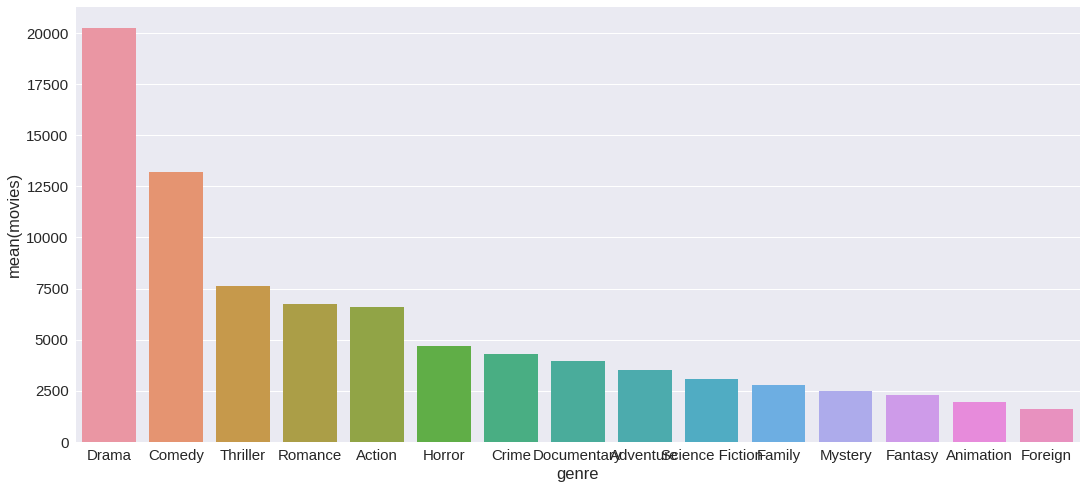

In [72]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

**Drama** is the most commonly occurring genre with almost half the movies identifying itself as a drama film. **Comedy** comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Action, Horror, Crime, Mystery, Science Fiction, Animation and Fantasy.

The next question I want to answer is the trends in the share of genres of movies across the world. Has the demand for Science Fiction movies increased? Do certain years have a disproportionate share of Animation Movies? Let's find out!

We will only be looking at trends starting 2000. We will consider only those themes that appear in the top 15 most popular genres. We will exclude Documentaries, Family and Foreign Movies from our analysis.

In [112]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

## Regression: Predicting Movie Revenues

We will be using TMDB's **Popularity Score** and **Vote Average** as our features in our model to assign a nuerical value to popularity.

In [126]:
rgf = ddf[ddf['return'].notnull()]
rgf.shape

(8890, 18)

In [127]:
rgf.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'title', 'video',
       'vote_average', 'vote_count', 'return', 'year', 'day', 'month'],
      dtype='object')

In [ ]:
rgf = rgf.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'return'], axis=1)

We will perform the following feature engineering tasks:

1. **belongs_to_collection** will be turned into a Boolean variable. 1 indicates a movie is a part of collection whereas 0 indicates it is not.
2. **genres** will be converted into number of genres.
3. **homepage** will be converted into a Boolean variable that will indicate if a movie has a homepage or not.
4. **original_language** will be replaced by a feature called **is_foreign** to denote if a particular film is in English or a Foreign Language.
5. **production_companies** will be replaced with just the number of production companies collaborating to make the movie.
6. **production_countries** will be replaced with the number of countries the film was shot in.
7. **day** will be converted into a binary feature to indicate if the film was released on a Friday.
8. **month** will be converted into a variable that indicates if the month was a holiday season.

In [129]:
s = rgf.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_rgf = rgf.drop('genres', axis=1).join(s)
genres_train = gen_rgf['genre'].drop_duplicates()

In [95]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['May', 'Jun', 'Jul', 'Aug'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title'], axis=1)
    df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [96]:
rg = feature_engineering(rgf)

In [97]:
rg.to_csv('movies_metadata_updated.csv')

**Importing data in H2OFrame**

In [68]:
hh = h2o.import_file('movies_metadata_updated.csv')
hh

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,belongs_to_collection,budget,genres,homepage,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_nan,is_TV Movie,is_english,is_Friday,is_Holiday,is_1902,is_1903,is_1904,is_1905,is_1914,is_1915,is_1916,is_1918,is_1919,is_1920,is_1921,is_1922,is_1923,is_1924,is_1925,is_1926,is_1927,is_1928,is_1929,is_1930,is_1931,is_1932,is_1933,is_1934,is_1935,is_1936,is_1937,is_1938,is_1939,is_1940,is_1941,is_1942,is_1943,is_1944,is_1945,is_1946,is_1947,is_1948,is_1949,is_1950,is_1951,is_1952,is_1953,is_1954,is_1955,is_1956,is_1957,is_1958,is_1959,is_1960,is_1961,is_1962,is_1963,is_1964,is_1965,is_1966,is_1967,is_1968,is_1969,is_1970,is_1971,is_1972,is_1973,is_1974,is_1975,is_1976,is_1977,is_1978,is_1979,is_1980,is_1981,is_1982,is_1983,is_1984,is_1985,is_1986,is_1987,is_1988,is_1989,is_1990,is_1991,is_1992,is_1993,is_1994,is_1995,is_1996,is_1997,is_1998,is_1999,is_2000,is_2001,is_2002,is_2003,is_2004,is_2005,is_2006,is_2007,is_2008,is_2009,is_2010,is_2011,is_2012,is_2013,is_2014,is_2015,is_2016,is_2017,is_2018,is_NaT
0,1,3e+07,3,1,21.9469,1,58,3.73554e+08,81,1,7.7,5415,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,6.5e+07,3,1,17.0155,3,58,2.62797e+08,104,2,6.9,2413,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1.6e+07,3,1,3.85949,1,58,8.14522e+07,127,1,6.1,34,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,6e+07,4,1,17.9249,3,58,1.87437e+08,170,2,7.7,1886,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,5.8e+07,2,1,6.67728,7,99,0,127,2,6.2,141,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,3.5e+07,3,1,5.23158,3,58,6.43502e+07,106,1,5.5,174,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,5.8e+07,3,1,14.686,2,106,3.52194e+08,130,3,6.6,1194,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,6.2e+07,3,1,6.31844,2,58,1.07879e+08,106,1,6.5,199,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,4.4e+07,2,1,5.092,2,58,1.36818e+07,192,1,7.1,72,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
hh.shape

(8890, 146)

**Performing a train-validation-test split of 70-15-15%**

In [69]:
splits = hh.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [70]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

6227
1318
1345


In [71]:
y='revenue'
x = list(hh.columns)
x.remove(y)
x.remove('C1')

In [34]:
x

['belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'popularity',
 'production_companies',
 'production_countries',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count',
 'is_Animation',
 'is_Comedy',
 'is_Family',
 'is_Adventure',
 'is_Fantasy',
 'is_Drama',
 'is_Romance',
 'is_Action',
 'is_Crime',
 'is_Thriller',
 'is_History',
 'is_Science Fiction',
 'is_Mystery',
 'is_Horror',
 'is_War',
 'is_Foreign',
 'is_Western',
 'is_Documentary',
 'is_Music',
 'is_nan',
 'is_TV Movie',
 'is_english',
 'is_Friday',
 'is_Holiday',
 'is_1902',
 'is_1903',
 'is_1904',
 'is_1905',
 'is_1914',
 'is_1915',
 'is_1916',
 'is_1918',
 'is_1919',
 'is_1920',
 'is_1921',
 'is_1922',
 'is_1923',
 'is_1924',
 'is_1925',
 'is_1926',
 'is_1927',
 'is_1928',
 'is_1929',
 'is_1930',
 'is_1931',
 'is_1932',
 'is_1933',
 'is_1934',
 'is_1935',
 'is_1936',
 'is_1937',
 'is_1938',
 'is_1939',
 'is_1940',
 'is_1941',
 'is_1942',
 'is_1943',
 'is_1944',
 'is_1945',
 'is_1946',
 'is_1947',
 'is_1

### Gradient Boosting Estimator

In [35]:
gbm_fit = H2OGradientBoostingEstimator(model_id='gbm_fit', 
                                        ntrees=40)

# The use of a validation_frame is recommended with using early stopping
gbm_fit.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [36]:
gbm_perf = gbm_fit.model_performance(test)

In [37]:
print (gbm_perf.r2())

0.8001713008929872


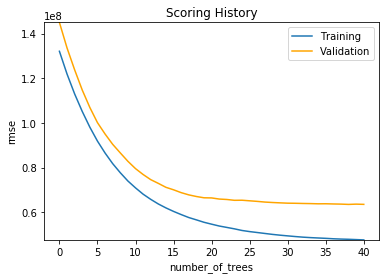

In [38]:
gbm_fit.plot()

**The plot shows that the model is underfitting and it continues to do so**

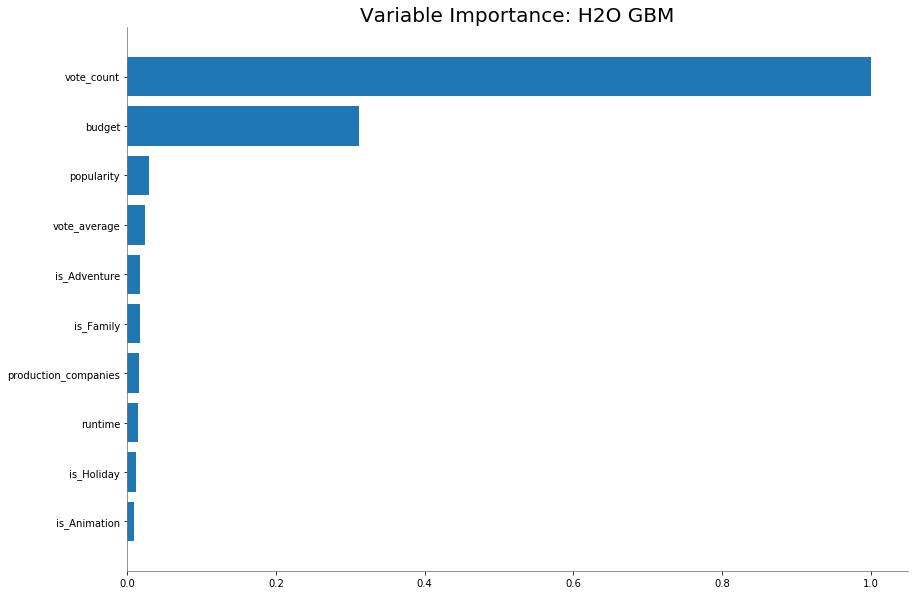

In [39]:
gbm_fit.varimp_plot()

**Vote count has the highest variable importance followed by the budget feature**

In [40]:
gbm_perf.show()


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 4374036890201267.0
RMSE: 66136501.95014299
MAE: 28533165.888724107
RMSLE: NaN
Mean Residual Deviance: 4374036890201267.0


In [42]:
gbm_fit.summary

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_fit


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2268478341815566.0
RMSE: 47628545.45139465
MAE: 22985590.0592656
RMSLE: NaN
Mean Residual Deviance: 2268478341815566.0

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 4038105363297113.0
RMSE: 63546088.497224696
MAE: 28717188.32248117
RMSLE: NaN
Mean Residual Deviance: 4038105363297113.0
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-10-29 14:22:05,0.077 sec,0.0,132096865.7828023,70755450.0317386,17449581949639692.0000000,145013357.0965579,74276699.4215710,21028873736413816.0000000
,2018-10-29 14:22:05,0.454 sec,1.0,121927226.9930701,65030649.5020074,14866248682219652.0000000,133603559.7432259,68126664.4319372,17849911176061736.0000000
,2018-10-29 14:22:06,0.714 sec,2.0,113005089.7660575,59997584.4645897,12770150313034704.0000000,123804403.0087515,62852305.9066811,15327530204353360.0000000
,2018-10-29 14:22:06,0.869 sec,3.0,105156769.1109858,55569905.8861410,11057946089861174.0000000,114744660.7128214,58178960.8594885,13166337162100500.0000000
,2018-10-29 14:22:06,0.952 sec,4.0,98098147.4918950,51662549.5463305,9623246541341596.0000000,106926832.1613483,54126651.9461113,11433347436061154.0000000
---,---,---,---,---,---,---,---,---,---
,2018-10-29 14:22:08,3.584 sec,36.0,48130443.9516485,23220024.8379292,2316539634982773.0000000,63719370.2314990,28865838.4527830,4060158142698845.0000000
,2018-10-29 14:22:09,3.666 sec,37.0,47996251.5621291,23165911.6858088,2303640164015184.5000000,63650983.1629748,28834139.3849232,4051447657613303.5000000
,2018-10-29 14:22:09,3.750 sec,38.0,47897197.6891636,23127469.3791760,2294141546474815.0000000,63521159.7173154,28786801.7769252,4034937731832687.5000000
,2018-10-29 14:22:09,3.825 sec,39.0,47762682.9506502,23080389.4659999,2281273882644334.5000000,63640696.4514073,28788691.3013834,4050138244820163.0000000



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
vote_count,336984480945904025600.0000000,1.0,0.6771989
budget,105270225118808768512.0000000,0.3123889,0.2115495
popularity,9902590946866888704.0000000,0.0293859,0.0199001
vote_average,8160117904516317184.0000000,0.0242151,0.0163984
is_Adventure,5977997990973931520.0000000,0.0177397,0.0120133
---,---,---,---
is_2011,0.0,0.0,0.0
is_2015,0.0,0.0,0.0
is_2017,0.0,0.0,0.0
is_2018,0.0,0.0,0.0



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

**Prediction on the test dataset using the model**

In [43]:
pred = gbm_fit.predict(test)
pred

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
5.0469e+07
1.46907e+08
1.08638e+07
1.912e+07
3.28439e+08
1.22645e+07
1.53938e+07
2.55005e+06
1.03728e+07
4.27873e+06


### Distributed Random Forest Estimator

In [44]:
rf = H2ORandomForestEstimator(model_id='rf', ntrees=150, seed=1, nfolds=5)
rf.train(x=x, y=y, training_frame=hh)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [45]:
rf_perf = rf.model_performance(test)

In [46]:
print (rf_perf.r2())

0.97221131092267


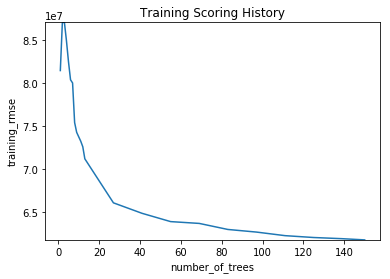

In [47]:
rf.plot()

**The plot shows that after around 50 trees, there is no significant decrese in the score**

In [48]:
rf.summary

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 3821113948535711.5
RMSE: 61815159.53660325
MAE: 26541522.551024526
RMSLE: 9.176460189101972
Mean Residual Deviance: 3821113948535711.5

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 3853041247273398.5
RMSE: 62072870.46104279
MAE: 26462236.254975177
RMSLE: 9.219225557679824
Mean Residual Deviance: 3853041247273398.5
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,26464554.0000000,369925.94,25682156.0000000,26687424.0000000,27284688.0000000,26339404.0000000,26329094.0000000
mean_residual_deviance,3849247130000000.0000000,198100770000000.0000000,4215243040000000.0000000,3903567730000000.0000000,4043259400000000.0000000,3421262500000000.0000000,3662903530000000.0000000
mse,3849247130000000.0000000,198100770000000.0000000,4215243040000000.0000000,3903567730000000.0000000,4043259400000000.0000000,3421262500000000.0000000,3662903530000000.0000000
r2,0.7931708,0.0059932,0.7863239,0.8075893,0.7891166,0.7850171,0.7978066
residual_deviance,3849247130000000.0000000,198100770000000.0000000,4215243040000000.0000000,3903567730000000.0000000,4043259400000000.0000000,3421262500000000.0000000,3662903530000000.0000000
rmse,62000712.0000000,1606091.5,64924904.0000000,62478536.0000000,63586628.0000000,58491560.0000000,60521928.0000000
rmsle,9.217586,0.0878765,9.126372,9.389712,9.084464,9.344166,9.143212


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2018-10-29 14:29:47,4 min 37.571 sec,0.0,nan,nan,nan
,2018-10-29 14:29:48,4 min 37.892 sec,1.0,81432712.0901587,34693310.3749356,6631286598358682.0000000
,2018-10-29 14:29:48,4 min 38.163 sec,2.0,86999158.1304335,35063607.2326416,7568853515404178.0000000
,2018-10-29 14:29:48,4 min 38.455 sec,3.0,87005175.1614673,34839096.5129053,7569900504877598.0000000
,2018-10-29 14:29:48,4 min 38.740 sec,4.0,84884608.0988423,34286075.0789700,7205396692094049.0000000
---,---,---,---,---,---,---
,2018-10-29 14:30:16,5 min 6.543 sec,97.0,62721497.3684403,26761774.8592615,3933986232139261.0000000
,2018-10-29 14:30:20,5 min 10.706 sec,111.0,62306896.5850886,26638490.2078919,3882149362064929.5000000
,2018-10-29 14:30:25,5 min 14.934 sec,125.0,62091336.3745374,26621850.0346972,3855334052775952.0000000
,2018-10-29 14:30:29,5 min 19.074 sec,139.0,61954319.6177965,26611954.0439104,3838337719304084.5000000



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
vote_count,7439045301540631871488.0000000,1.0,0.4091552
budget,5089694705176771821568.0000000,0.6841865,0.2799385
popularity,1772325064519666630656.0000000,0.2382463,0.0974797
runtime,603041208410396688384.0000000,0.0810643,0.0331679
is_Adventure,494798387635197837312.0000000,0.0665137,0.0272144
---,---,---,---
is_1905,0.0,0.0,0.0
is_1919,0.0,0.0,0.0
is_1923,0.0,0.0,0.0
is_2018,0.0,0.0,0.0



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

**Model prediction on the test data**

In [49]:
pred = rf.predict(test)
pred

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
2.39205e+07
1.65425e+08
1.7993e+06
7.89313e+06
2.61104e+08
4.89119e+06
1.36587e+07
1.18259e+06
3.06515e+06
1.64497e+06


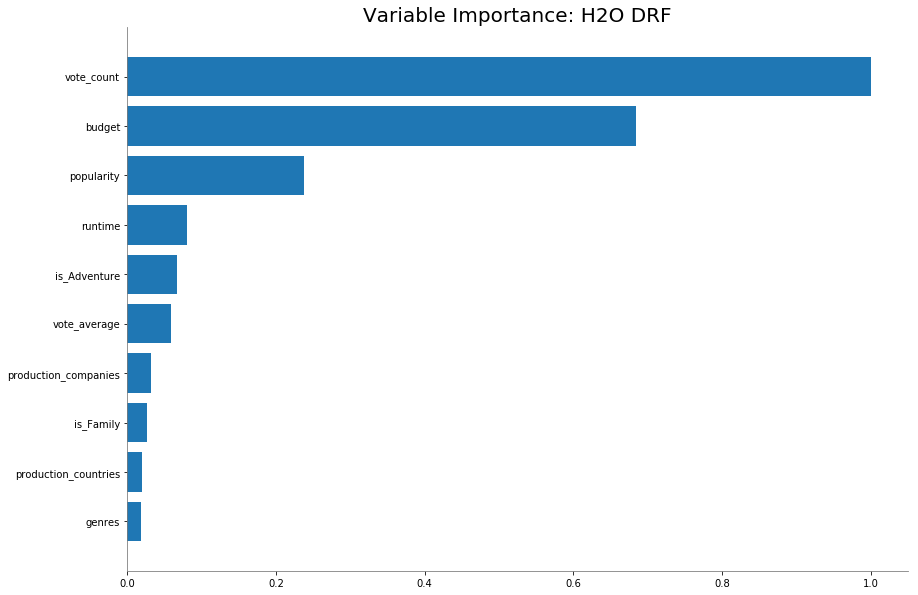

In [50]:
rf.varimp_plot()

**The plot above shows that vote count, budget and popularity are mainly important features for this model**

In [51]:
rf_perf.show()


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 608264737236178.5
RMSE: 24663023.6839723
MAE: 10823828.183071066
RMSLE: 8.757936920252895
Mean Residual Deviance: 608264737236178.5


### Deep Learning Estimator

In [56]:
dl_fit = H2ODeepLearningEstimator(model_id='dl_fit', 
                                   epochs=20, 
                                   hidden=[50,100, 100], seed=1)
dl_fit.train(x=x, y=y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [57]:
dl_perf = dl_fit.model_performance(test)

In [58]:
print (dl_perf.r2())

0.7141418192089595


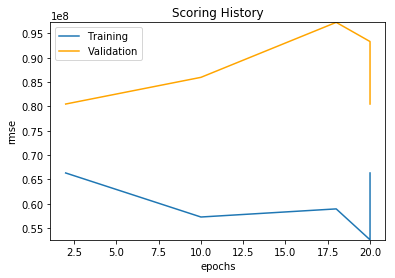

In [59]:
dl_fit.plot()

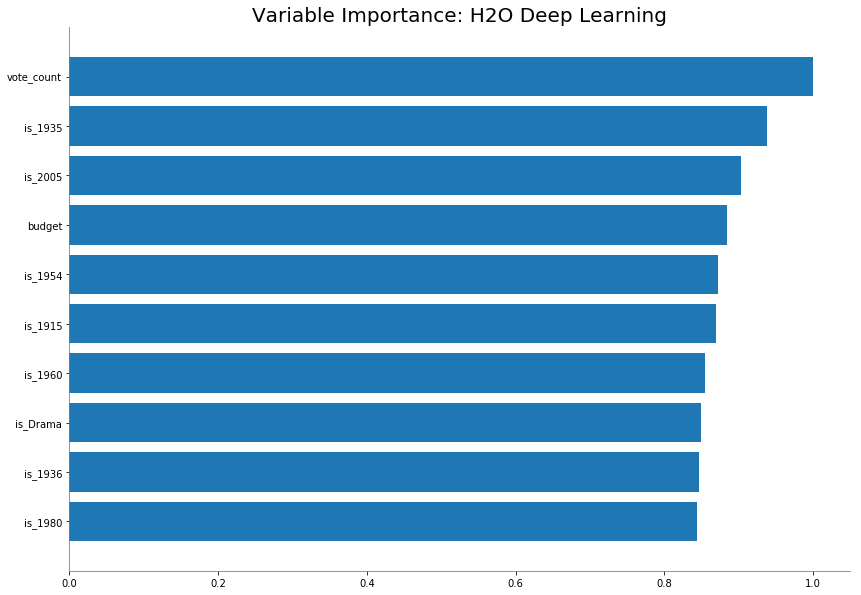

In [60]:
dl_fit.varimp_plot()

In [61]:
dl_fit.summary

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl_fit


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 4400237052881136.5
RMSE: 66334282.63636486
MAE: 37891869.22495517
RMSLE: NaN
Mean Residual Deviance: 4400237052881136.5

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 6479088817828030.0
RMSE: 80492787.36525422
MAE: 43578179.32847564
RMSLE: NaN
Mean Residual Deviance: 6479088817828030.0
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
,2018-10-29 14:47:56,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-10-29 14:47:58,2.397 sec,5645 obs/sec,2.0,1,12454.0,66334282.6363649,4400237052881136.5000000,37891869.2249552,0.7478314,80492787.3652542,6479088817828030.0000000,43578179.3284756,0.6917733
,2018-10-29 14:48:04,8.745 sec,7414 obs/sec,10.0,5,62270.0,57289367.0044704,3282071571772905.0000000,31924575.5464740,0.8119112,85973845.0133270,7391502026375569.0000000,43075691.5827332,0.6483674
,2018-10-29 14:48:10,14.413 sec,8039 obs/sec,18.0,9,112086.0,58956118.0454884,3475823854993564.5000000,33411839.8428605,0.8008076,97265995.9232176,9460673962935388.0000000,48522074.3861492,0.5499317
,2018-10-29 14:48:11,15.875 sec,8159 obs/sec,20.0,10,124540.0,52608948.4327578,2767701455200574.5000000,30610005.6054299,0.8413887,93327273.2754131,8709979937023633.0000000,46534258.8605075,0.5856441
,2018-10-29 14:48:11,16.035 sec,8152 obs/sec,20.0,10,124540.0,66334282.6363649,4400237052881136.5000000,37891869.2249552,0.7478314,80492787.3652542,6479088817828030.0000000,43578179.3284756,0.6917733


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
vote_count,1.0,1.0,0.0099199
is_1935,0.9378460,0.9378460,0.0093033
is_2005,0.9026383,0.9026383,0.0089541
budget,0.8834962,0.8834962,0.0087642
is_1954,0.8715876,0.8715876,0.0086461
---,---,---,---
is_Thriller,0.5987533,0.5987533,0.0059396
genres,0.5905429,0.5905429,0.0058581
is_1996,0.5855525,0.5855525,0.0058086
is_2008,0.5841891,0.5841891,0.0057951



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

In [62]:
pred = dl_fit.predict(test)
pred

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict
8.70001e+07
1.15558e+08
2.26129e+07
2.98342e+07
3.36964e+08
1.57317e+07
5.31898e+07
1.94075e+07
3.32213e+07
1.92677e+07


In [63]:
dl_perf.show()


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 6257130400855188.0
RMSE: 79102025.26392853
MAE: 41888571.976444945
RMSLE: NaN
Mean Residual Deviance: 6257130400855188.0


### AutoML

In [75]:
aml = H2OAutoML(max_runtime_secs=600, seed = 1, project_name = "Revenue prediction")
aml.train(y = y, training_frame = hh)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [76]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_0_AutoML_20181029_153514_model_10,3.94125e+15,6.27794e+07,3.94125e+15,2.68334e+07,nan
GBM_grid_0_AutoML_20181029_153514_model_12,4.00379e+15,6.32755e+07,4.00379e+15,2.75281e+07,nan
GBM_grid_0_AutoML_20181029_153514_model_2,4.01251e+15,6.33444e+07,4.01251e+15,2.70256e+07,nan
GBM_grid_0_AutoML_20181029_153514_model_3,4.01856e+15,6.33921e+07,4.01856e+15,2.70103e+07,nan
XRT_0_AutoML_20181029_153125,4.02029e+15,6.34058e+07,4.02029e+15,2.718e+07,8.93477
GBM_grid_0_AutoML_20181029_153514_model_1,4.05372e+15,6.36688e+07,4.05372e+15,2.68725e+07,nan
DRF_0_AutoML_20181029_153125,4.05827e+15,6.37045e+07,4.05827e+15,2.72021e+07,8.9192
DRF_0_AutoML_20181029_152936,4.10431e+15,6.40649e+07,4.10431e+15,2.73696e+07,8.88095
DRF_0_AutoML_20181029_153514,4.13326e+15,6.42904e+07,4.13326e+15,2.75095e+07,8.84844
XRT_0_AutoML_20181029_152936,4.15334e+15,6.44464e+07,4.15334e+15,2.75022e+07,8.89745


**If you see the leaderboard, it is dominant with GBM models**

In [77]:
pred = aml.predict(test)
pred.head()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
6.39991e+07
2.05521e+08
541122
8.78571e+06
4.31191e+08
1.02049e+07
1.69662e+07
-1.38016e+06
6.33032e+06
-737548


In [78]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 2173304401493608.8
RMSE: 46618712.99696731
MAE: 18502262.980723187
RMSLE: NaN
Mean Residual Deviance: 2173304401493608.8


In [79]:
perf.r2()

0.9007121791114958

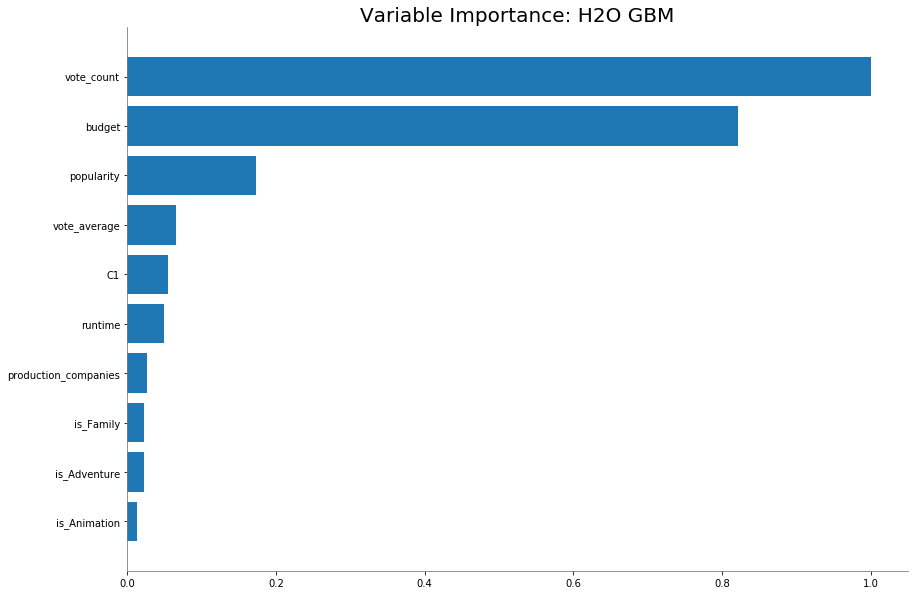

In [80]:
aml.leader.varimp_plot()

**The plot shows that vote count, budget and popularity are the main features used in prediction.**

In [81]:
aml.leader.summary

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20181029_153514_model_10


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1418708531758769.2
RMSE: 37665747.460508056
MAE: 16038114.103532184
RMSLE: NaN
Mean Residual Deviance: 1418708531758769.2

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 3667897008963584.0
RMSE: 60563165.44702385
MAE: 24253424.89093909
RMSLE: NaN
Mean Residual Deviance: 3667897008963584.0

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 3941248367217762.5
RMSE: 62779362.590088174
MAE: 26833392.586936258
RMSLE: NaN
Mean Residual Deviance: 3941248367217762.5
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,26832970.0000000,1310346.8,29506660.0000000,27151686.0000000,24550472.0000000,27971016.0000000,24985014.0000000
mean_residual_deviance,3940981460000000.0000000,971519250000000.0000000,6465734500000000.0000000,3305494070000000.0000000,2822214960000000.0000000,4301319820000000.0000000,2810143950000000.0000000
mse,3940981460000000.0000000,971519250000000.0000000,6465734500000000.0000000,3305494070000000.0000000,2822214960000000.0000000,4301319820000000.0000000,2810143950000000.0000000
r2,0.78674,0.0190109,0.7535745,0.7579148,0.8237789,0.7989639,0.799468
residual_deviance,3940981460000000.0000000,971519250000000.0000000,6465734500000000.0000000,3305494070000000.0000000,2822214960000000.0000000,4301319820000000.0000000,2810143950000000.0000000
rmse,61924596.0000000,7291292.0,80409792.0000000,57493428.0000000,53124524.0000000,65584448.0000000,53010788.0000000
rmsle,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-10-29 15:43:00,4 min 23.717 sec,0.0,135199031.2997855,72901970.0179819,18278778064400372.0000000,141836742.6171234,72774034.2202419,20117661556236096.0000000
,2018-10-29 15:43:00,4 min 24.311 sec,5.0,100790067.8980850,52494148.7896001,10158637786900574.0000000,108522588.6561558,53654834.0306203,11777152248633186.0000000
,2018-10-29 15:43:01,4 min 24.786 sec,10.0,79711936.3281042,39964561.0527060,6353992793175739.0000000,87728012.4150148,42091789.2803972,7696204162288995.0000000
,2018-10-29 15:43:01,4 min 25.249 sec,15.0,66204002.2363622,31858284.1803024,4382969912112245.0000000,76089748.1472294,34983439.7143575,5789649773108805.0000000
,2018-10-29 15:43:02,4 min 25.693 sec,20.0,58166109.3471271,27041782.1183411,3383296276581950.5000000,69259797.0581762,30987311.4150442,4796919488539756.0000000
,2018-10-29 15:43:02,4 min 26.125 sec,25.0,52787803.9968764,23773001.1874029,2786552250812641.5000000,65652032.5949464,28380286.3646682,4310189383847910.0000000
,2018-10-29 15:43:02,4 min 26.549 sec,30.0,48860816.6684693,21320154.3149993,2387379405509768.5000000,63303629.1641902,26740480.4971415,4007349465357309.0000000
,2018-10-29 15:43:03,4 min 26.941 sec,35.0,46265848.4352859,19791655.9595212,2140528731436848.5000000,62139590.8282828,25801712.1330401,3861328748306409.5000000
,2018-10-29 15:43:03,4 min 27.370 sec,40.0,44170628.3111854,18588495.8459612,1951044405404891.7500000,61405824.6662374,25165866.4074858,3770675302940694.0000000
,2018-10-29 15:43:04,4 min 27.791 sec,45.0,42326527.0834858,17686953.9115996,1791534894949054.0000000,60850332.4624426,24755329.3158698,3702762960789795.5000000


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
vote_count,305509526837653405696.0000000,1.0,0.4261456
budget,250701898049019445248.0000000,0.8206026,0.3496961
popularity,53068821518050394112.0000000,0.1737059,0.0740240
vote_average,20054520344587796480.0000000,0.0656429,0.0279734
C1,16705420021010006016.0000000,0.0546805,0.0233019
---,---,---,---
is_1985,0.0,0.0,0.0
is_1988,0.0,0.0,0.0
is_1994,0.0,0.0,0.0
is_2018,0.0,0.0,0.0



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

In [82]:
perf.show()


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 2173304401493608.8
RMSE: 46618712.99696731
MAE: 18502262.980723187
RMSLE: NaN
Mean Residual Deviance: 2173304401493608.8


## Classification: Predicting Movie Sucess

In [162]:
cls = ddf[ddf['return'].notnull()]
cls.shape

(8890, 18)

In [ ]:
cls = cls.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'revenue'], axis=1)

Let us convert our **return** feature into a binary variable that will serve as our classes: **0** indicating a flop and **1** indicating a hit.

In [163]:
cls['return'] = cls['return'].apply(lambda x: 1 if x >=1 else 0)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [164]:
cls['return'].value_counts()

0    5114
1    3776
Name: return, dtype: int64

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



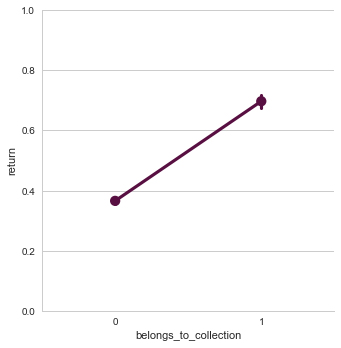

In [165]:
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)
sns.set(style="whitegrid")
g = sns.PairGrid(data=cls, x_vars=['belongs_to_collection'], y_vars='return', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

It seems that movies that belong to a franchise have a higher probability of being a success. 

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



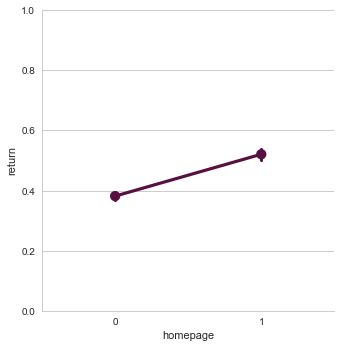

In [166]:
cls['homepage'] = cls['homepage'].fillna('').apply(lambda x: 0 if x == '' else 1)
g = sns.PairGrid(data=cls, x_vars=['homepage'], y_vars='return', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

There is not much difference and so we will drop this feature

In [167]:
s = cls.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_cls = cls.drop('genres', axis=1).join(s)

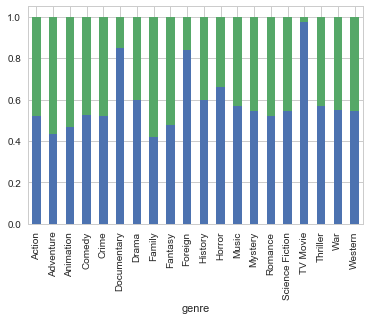

In [169]:
ctab = pd.crosstab([gen_cls['genre']], gen_cls['return'], dropna=False).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', stacked=True, legend=False)

We find that **TV Movies** have a 0% Failure Rate but that is most probably because they are extremely few in numner. **Foreign Films** have a higher rate of failure than average. Since there isn't anything drastic about a particular genre, we will proceed with one hot encoding all genres.

In [170]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'title', 'video',
       'vote_average', 'vote_count', 'return', 'year', 'day', 'month'],
      dtype='object')

In [171]:
def classification_engineering(df):
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df = df.drop('homepage', axis=1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['May', 'Jun', 'Jul', 'Aug'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df
    

In [172]:
cls = classification_engineering(cls)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

F:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [173]:
cls.to_csv('movies_new_updated.csv')

**Importing data in H2OFrame**

In [216]:
cc = h2o.import_file('movies_new_updated.csv')
cc

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,belongs_to_collection,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,video,vote_average,vote_count,return,year,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_nan,is_TV Movie,is_english,is_Friday,is_Holiday
0,1,3e+07,3,21.9469,1,58,81,1,False,7.7,5415,1,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,6.5e+07,3,17.0155,3,58,104,2,False,6.9,2413,1,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,1.6e+07,3,3.85949,1,58,127,1,False,6.1,34,1,1995,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5,0,6e+07,4,17.9249,3,58,170,2,False,7.7,1886,1,1995,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6,0,5.8e+07,2,6.67728,7,99,127,2,False,6.2,141,0,1995,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8,0,3.5e+07,3,5.23158,3,58,106,1,False,5.5,174,1,1995,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
9,1,5.8e+07,3,14.686,2,106,130,3,False,6.6,1194,1,1995,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
10,0,6.2e+07,3,6.31844,2,58,106,1,False,6.5,199,1,1995,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
13,0,4.4e+07,2,5.092,2,58,192,1,False,7.1,72,0,1995,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
14,0,9.8e+07,2,7.28448,4,178,119,2,False,5.7,137,0,1995,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


**Selecting 'return' feature as the output variable**

In [217]:
cc['return'] = cc['return'].asfactor()
cc['return'].levels()

[['0', '1']]

In [218]:
splits = cc.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [219]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

6227
1318
1345


In [220]:
y='return'
x = list(cc.columns)
x.remove(y)
x.remove('C1')

In [221]:
x

['belongs_to_collection',
 'budget',
 'genres',
 'popularity',
 'production_companies',
 'production_countries',
 'runtime',
 'spoken_languages',
 'video',
 'vote_average',
 'vote_count',
 'year',
 'is_Animation',
 'is_Comedy',
 'is_Family',
 'is_Adventure',
 'is_Fantasy',
 'is_Drama',
 'is_Romance',
 'is_Action',
 'is_Crime',
 'is_Thriller',
 'is_History',
 'is_Science Fiction',
 'is_Mystery',
 'is_Horror',
 'is_War',
 'is_Foreign',
 'is_Western',
 'is_Documentary',
 'is_Music',
 'is_nan',
 'is_TV Movie',
 'is_english',
 'is_Friday',
 'is_Holiday']

### Gradient Boosting Estimator

In [229]:
gbm_fit2 = H2OGradientBoostingEstimator(model_id='gbm_fit2',
                                        ntrees=300, score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm_fit2.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [230]:
gbm_perf2 = gbm_fit2.model_performance(test)

In [231]:
print(gbm_fit2.auc(train=True))
print(gbm_fit2.auc(valid=True))
print(gbm_perf2.auc())

0.9393939345910307
0.8881144534115921
0.8895226086446543


In [232]:
gbm_fit2.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3953333832295283: 


,0,1,Error,Rate
0,3074.0,519.0,0.1444,(519.0/3593.0)
1,358.0,2276.0,0.1359,(358.0/2634.0)
Total,3432.0,2795.0,0.1408,(877.0/6227.0)


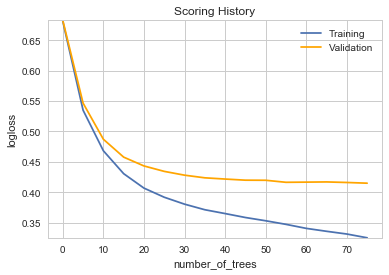

In [236]:
gbm_fit2.plot()

**The plot shows that the model is overfitting as the validation score is constant but the training score keeps on improving**

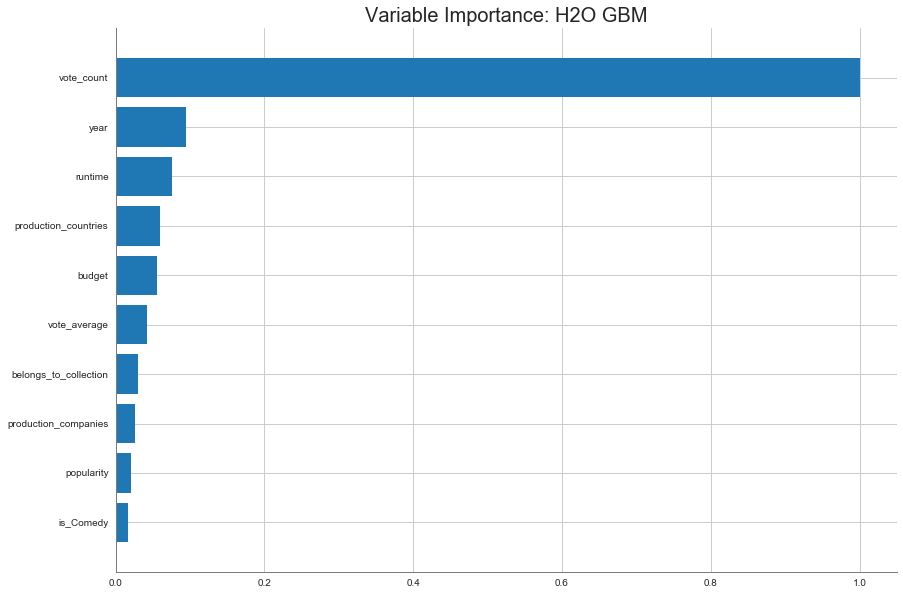

In [238]:
gbm_fit2.varimp_plot()

**The model uses vote count feature heavily in its prediction**

In [240]:
gbm_fit2.summary

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_fit2


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.09945281833131522
RMSE: 0.3153614090711088
LogLoss: 0.3249223258580524
Mean Per-Class Error: 0.140181247557841
AUC: 0.9393939345910307
Gini: 0.8787878691820614
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3953333832295283: 


,0,1,Error,Rate
0,3074.0,519.0,0.1444,(519.0/3593.0)
1,358.0,2276.0,0.1359,(358.0/2634.0)
Total,3432.0,2795.0,0.1408,(877.0/6227.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3953334,0.8384601,218.0
max f2,0.2332610,0.8870112,281.0
max f0point5,0.6327231,0.8658421,136.0
max accuracy,0.4825638,0.8631765,186.0
max precision,0.9890768,1.0,0.0
max recall,0.0382028,1.0,385.0
max specificity,0.9890768,1.0,0.0
max absolute_mcc,0.4825638,0.7184095,186.0
max min_per_class_accuracy,0.4018056,0.8580573,216.0
max mean_per_class_accuracy,0.3953334,0.8598188,218.0


Gains/Lift Table: Avg response rate: 42.30 %, avg score: 42.31 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101172,0.9826114,2.3640850,2.3640850,1.0,0.9850063,1.0,0.9850063,0.0239180,0.0239180,136.4085042,136.4085042
,2,0.0200739,0.9795187,2.3640850,2.3640850,1.0,0.9810011,1.0,0.9830197,0.0235383,0.0474563,136.4085042,136.4085042
,3,0.0300305,0.9757622,2.3640850,2.3640850,1.0,0.9775657,1.0,0.9812114,0.0235383,0.0709947,136.4085042,136.4085042
,4,0.0401477,0.9726844,2.3640850,2.3640850,1.0,0.9742686,1.0,0.9794618,0.0239180,0.0949127,136.4085042,136.4085042
,5,0.0501044,0.9694307,2.3640850,2.3640850,1.0,0.9711988,1.0,0.9778198,0.0235383,0.1184510,136.4085042,136.4085042
,6,0.1000482,0.9443702,2.3640850,2.3640850,1.0,0.9583029,1.0,0.9680770,0.1180714,0.2365224,136.4085042,136.4085042
,7,0.1499920,0.9063928,2.3336788,2.3539605,0.9871383,0.9266339,0.9957173,0.9542775,0.1165528,0.3530752,133.3678803,135.3960481
,8,0.2000964,0.8431880,2.2352727,2.3242409,0.9455128,0.8753731,0.9831461,0.9345197,0.1119970,0.4650721,123.5272716,132.4240912
,9,0.2999839,0.6654661,1.9764055,2.2084199,0.8360129,0.7548995,0.9341542,0.8747104,0.1974184,0.6624905,97.6405501,120.8419913
,10,0.4000321,0.4717606,1.4761301,2.0252740,0.6243981,0.5672801,0.8566841,0.7978220,0.1476841,0.8101746,47.6130146,102.5273978




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.13410551126899026
RMSE: 0.3662041934071622
LogLoss: 0.4148031719841158
Mean Per-Class Error: 0.19488731493500389
AUC: 0.8881144534115921
Gini: 0.7762289068231842
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3467795771134633: 


,0,1,Error,Rate
0,573.0,181.0,0.2401,(181.0/754.0)
1,89.0,475.0,0.1578,(89.0/564.0)
Total,662.0,656.0,0.2049,(270.0/1318.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3467796,0.7786885,234.0
max f2,0.1909106,0.8565415,296.0
max f0point5,0.5462020,0.8065811,162.0
max accuracy,0.5357312,0.8171472,165.0
max precision,0.9880546,1.0,0.0
max recall,0.0163698,1.0,398.0
max specificity,0.9880546,1.0,0.0
max absolute_mcc,0.5357312,0.6246174,165.0
max min_per_class_accuracy,0.4056942,0.7970822,212.0
max mean_per_class_accuracy,0.5305637,0.8051127,167.0


Gains/Lift Table: Avg response rate: 42.79 %, avg score: 42.80 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106222,0.9816008,2.3368794,2.3368794,1.0,0.9837608,1.0,0.9837608,0.0248227,0.0248227,133.6879433,133.6879433
,2,0.0204856,0.9788135,2.3368794,2.3368794,1.0,0.9799680,1.0,0.9819346,0.0230496,0.0478723,133.6879433,133.6879433
,3,0.0303490,0.9756470,2.3368794,2.3368794,1.0,0.9770535,1.0,0.9803482,0.0230496,0.0709220,133.6879433,133.6879433
,4,0.0402124,0.9731727,2.3368794,2.3368794,1.0,0.9742039,1.0,0.9788411,0.0230496,0.0939716,133.6879433,133.6879433
,5,0.0500759,0.9686181,2.3368794,2.3368794,1.0,0.9714708,1.0,0.9773894,0.0230496,0.1170213,133.6879433,133.6879433
,6,0.1001517,0.9493050,2.2660649,2.3014722,0.9696970,0.9591282,0.9848485,0.9682588,0.1134752,0.2304965,126.6064904,130.1472168
,7,0.1502276,0.9126379,2.2306576,2.2778673,0.9545455,0.9334963,0.9747475,0.9566713,0.1117021,0.3421986,123.0657640,127.7867326
,8,0.2003035,0.8581351,1.8057705,2.1598431,0.7727273,0.8846937,0.9242424,0.9386769,0.0904255,0.4326241,80.5770471,115.9843112
,9,0.3004552,0.6641380,1.6641414,1.9946092,0.7121212,0.7663592,0.8535354,0.8812377,0.1666667,0.5992908,66.4141414,99.4609213
,10,0.3998483,0.4869725,1.4627795,1.8624087,0.6259542,0.5717525,0.7969639,0.8043068,0.1453901,0.7446809,46.2779492,86.2408656



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-10-21 03:48:11,0.000 sec,0.0,0.4940349,0.6812408,0.5,1.0,0.5770034,0.4948019,0.6827698,0.5,1.0,0.5720789
,2018-10-21 03:48:11,0.085 sec,5.0,0.4171535,0.5348894,0.8875967,2.3640850,0.1864461,0.4238493,0.5465200,0.8656974,2.3368794,0.2040971
,2018-10-21 03:48:11,0.163 sec,10.0,0.3824650,0.4681348,0.8959578,2.3640850,0.1877308,0.3939824,0.4870943,0.8746449,2.3368794,0.2078907
,2018-10-21 03:48:11,0.263 sec,15.0,0.3647769,0.4304417,0.9021814,2.3640850,0.1779348,0.3812519,0.4576725,0.8780746,2.3368794,0.2086495
,2018-10-21 03:48:11,0.347 sec,20.0,0.3544506,0.4066923,0.9076621,2.3640850,0.1788983,0.3760367,0.4431699,0.8799629,2.3368794,0.2040971
,2018-10-21 03:48:11,0.522 sec,25.0,0.3481052,0.3916680,0.9116330,2.3640850,0.1721535,0.3729117,0.4342311,0.8822615,2.3368794,0.1995448
,2018-10-21 03:48:11,0.631 sec,30.0,0.3431727,0.3802853,0.9151215,2.3640850,0.1663722,0.3708001,0.4279787,0.8840910,2.3368794,0.2010622
,2018-10-21 03:48:12,0.709 sec,35.0,0.3390941,0.3711017,0.9185232,2.3640850,0.1623575,0.3692636,0.4236231,0.8853432,2.3368794,0.2018209
,2018-10-21 03:48:12,0.788 sec,40.0,0.3362433,0.3648021,0.9212756,2.3640850,0.1602698,0.3688638,0.4216034,0.8860627,2.3368794,0.2033384
,2018-10-21 03:48:12,0.862 sec,45.0,0.3330892,0.3583150,0.9239773,2.3640850,0.1572186,0.3682527,0.4197548,0.8867564,2.3368794,0.2101669


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
vote_count,3110.8007812,1.0,0.6564144
year,292.4487305,0.0940108,0.0617100
runtime,237.3718109,0.0763057,0.0500882
production_countries,183.9129333,0.0591208,0.0388077
budget,172.5986938,0.0554837,0.0364203
---,---,---,---
is_Music,1.8557044,0.0005965,0.0003916
is_War,1.6773517,0.0005392,0.0003539
is_Animation,1.3356745,0.0004294,0.0002818
video,0.0,0.0,0.0



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

**Confusion Matrix**

In [243]:
gbm_perf2.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37932445339335064: 


,0,1,Error,Rate
0,610.0,157.0,0.2047,(157.0/767.0)
1,104.0,474.0,0.1799,(104.0/578.0)
Total,714.0,631.0,0.1941,(261.0/1345.0)


### Distributed Random Forest Estimator

In [244]:
rf = H2ORandomForestEstimator(model_id='rf2', ntrees=150, seed=1, nfolds=5)
rf.train(x=x, y=y, training_frame=cc)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [248]:
rf_perf = rf.model_performance(test)

In [251]:
print(rf.auc(train=True))

0.8786364222009373


In [254]:
rf.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3866316485190191: 


,0,1,Error,Rate
0,3895.0,1219.0,0.2384,(1219.0/5114.0)
1,659.0,3117.0,0.1745,(659.0/3776.0)
Total,4554.0,4336.0,0.2112,(1878.0/8890.0)


In [255]:
rf_perf.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5386991373697917: 


,0,1,Error,Rate
0,767.0,0.0,0.0,(0.0/767.0)
1,0.0,578.0,0.0,(0.0/578.0)
Total,767.0,578.0,0.0,(0.0/1345.0)


In [257]:
rf.summary

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf2


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.13863580115124674
RMSE: 0.3723382885914995
LogLoss: 0.43361960345831213
Mean Per-Class Error: 0.20422352357768303
AUC: 0.8786364222009373
Gini: 0.7572728444018746
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3866316485190191: 


,0,1,Error,Rate
0,3895.0,1219.0,0.2384,(1219.0/5114.0)
1,659.0,3117.0,0.1745,(659.0/3776.0)
Total,4554.0,4336.0,0.2112,(1878.0/8890.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3866316,0.7684911,226.0
max f2,0.2294348,0.8399257,292.0
max f0point5,0.6197978,0.7941795,136.0
max accuracy,0.4890864,0.8029246,186.0
max precision,0.9998834,1.0,0.0
max recall,0.0013345,1.0,398.0
max specificity,0.9998834,1.0,0.0
max absolute_mcc,0.4890864,0.5942049,186.0
max min_per_class_accuracy,0.4187890,0.7938991,213.0
max mean_per_class_accuracy,0.4446607,0.7957765,203.0


Gains/Lift Table: Avg response rate: 42.47 %, avg score: 43.01 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0128234,1.0,2.3543432,2.3543432,1.0,1.0,1.0,1.0,0.0301907,0.0301907,135.4343220,135.4343220
,2,0.0200225,0.9827904,2.3175566,2.3411166,0.984375,0.9893102,0.9943820,0.9961565,0.0166843,0.046875,131.7556608,134.1116573
,3,0.0301462,0.9772727,2.3020245,2.3279886,0.9777778,0.9804357,0.9888060,0.9908771,0.0233051,0.0701801,130.2024482,132.7988632
,4,0.0403825,0.9649123,2.2508556,2.3084368,0.9560440,0.9700705,0.9805014,0.9856030,0.0230403,0.0932203,125.0855606,130.8436807
,5,0.0500562,0.9580155,2.3269671,2.3120179,0.9883721,0.9619020,0.9820225,0.9810226,0.0225106,0.1157309,132.6967136,131.2017949
,6,0.1,0.9046768,2.2535943,2.2828390,0.9572072,0.9314229,0.9696288,0.9562506,0.1125530,0.2282839,125.3594299,128.2838983
,7,0.1500562,0.8406615,2.1744608,2.2466858,0.9235955,0.8760068,0.9542729,0.9294827,0.1088453,0.3371292,117.4460817,124.6685847
,8,0.2002250,0.7627119,2.0006639,2.1850421,0.8497758,0.8030292,0.9280899,0.8977983,0.1003708,0.4375,100.0663858,118.5042135
,9,0.3,0.6107178,1.6934284,2.0215395,0.7192785,0.6836812,0.8586427,0.8265865,0.1689619,0.6064619,69.3428382,102.1539548
,10,0.4,0.4846449,1.3109110,1.8438824,0.5568054,0.5455487,0.7831834,0.7563270,0.1310911,0.7375530,31.0911017,84.3882415




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.13676665513724523
RMSE: 0.3698197603390674
LogLoss: 0.42528451903422143
Mean Per-Class Error: 0.20231574963708798
AUC: 0.8825764621709763
Gini: 0.7651529243419526
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42370278741791845: 


,0,1,Error,Rate
0,4116.0,998.0,0.1952,(998.0/5114.0)
1,791.0,2985.0,0.2095,(791.0/3776.0)
Total,4907.0,3983.0,0.2012,(1789.0/8890.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4237028,0.7694291,206.0
max f2,0.2004400,0.8426624,302.0
max f0point5,0.5832822,0.8002804,142.0
max accuracy,0.5297429,0.8053993,162.0
max precision,0.9998467,1.0,0.0
max recall,0.0181784,1.0,392.0
max specificity,0.9998467,1.0,0.0
max absolute_mcc,0.5575831,0.5999188,151.0
max min_per_class_accuracy,0.4181542,0.7958157,209.0
max mean_per_class_accuracy,0.4237028,0.7976843,206.0


Gains/Lift Table: Avg response rate: 42.47 %, avg score: 42.89 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102362,0.99,2.3543432,2.3543432,1.0,0.9960523,1.0,0.9960523,0.0240996,0.0240996,135.4343220,135.4343220
,2,0.0201350,0.98,2.3275893,2.3411905,0.9886364,0.9840015,0.9944134,0.9901279,0.0230403,0.0471398,132.7589320,134.1190465
,3,0.0300337,0.9665459,2.3008354,2.3278899,0.9772727,0.9724115,0.9887640,0.9842888,0.0227754,0.0699153,130.0835420,132.7889926
,4,0.0401575,0.9555556,2.3020245,2.3213692,0.9777778,0.9602858,0.9859944,0.9782376,0.0233051,0.0932203,130.2024482,132.1369226
,5,0.0501687,0.9466667,2.2749833,2.3121128,0.9662921,0.9507992,0.9820628,0.9727622,0.0227754,0.1159958,127.4983337,131.2112849
,6,0.1006749,0.9,2.2547162,2.2833183,0.9576837,0.9228138,0.9698324,0.9477043,0.1138771,0.2298729,125.4716224,128.3318341
,7,0.1500562,0.8400679,2.1827282,2.2502156,0.9271071,0.8715103,0.9557721,0.9226299,0.1077860,0.3376589,118.2728225,125.0215597
,8,0.2,0.7631606,2.0786093,2.2073623,0.8828829,0.8032651,0.9375703,0.8928223,0.1038136,0.4414725,107.8609330,120.7362288
,9,0.3,0.6024305,1.7081568,2.0409605,0.7255343,0.6788409,0.8668916,0.8214952,0.1708157,0.6122881,70.8156780,104.0960452
,10,0.4,0.4783853,1.2605932,1.8458686,0.5354331,0.5376139,0.7840270,0.7505249,0.1260593,0.7383475,26.0593220,84.5868644



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7944260,0.0111762,0.7988037,0.7644096,0.7948718,0.8046358,0.8094089
auc,0.8830243,0.0039535,0.8812012,0.8783834,0.8779520,0.8843674,0.8932177
err,0.2055740,0.0111762,0.2011963,0.2355904,0.2051282,0.1953642,0.1905911
err_count,365.8,23.851206,370.0,421.0,368.0,354.0,316.0
f0point5,0.7476686,0.0172233,0.7620601,0.7010869,0.7497566,0.7545949,0.7708443
f1,0.7717507,0.0082002,0.7794994,0.7539451,0.77,0.7671053,0.7882038
f2,0.7981893,0.0086026,0.7977555,0.8154235,0.7913669,0.7800375,0.8063632
lift_top_group,2.355434,0.0430223,2.2788105,2.3890374,2.3481677,2.451962,2.3091922
logloss,0.4250385,0.0063324,0.4330500,0.4315617,0.4314356,0.4187114,0.4104336
max_per_class_error,0.2277791,0.0279445,0.2102713,0.3060635,0.2135922,0.2110961,0.1978723


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-10-21 03:56:11,32.595 sec,0.0,nan,nan,nan,nan,nan
,2018-10-21 03:56:11,32.651 sec,1.0,0.5167504,8.8794032,0.7234179,1.6095829,0.2737036
,2018-10-21 03:56:11,32.683 sec,2.0,0.5016235,7.8053108,0.7400937,1.6386900,0.2763527
,2018-10-21 03:56:11,32.733 sec,3.0,0.4846688,6.7089446,0.7567427,1.7033436,0.2777440
,2018-10-21 03:56:11,32.768 sec,4.0,0.4775308,5.9860673,0.7611683,1.7287931,0.2759692
---,---,---,---,---,---,---,---,---
,2018-10-21 03:56:15,36.437 sec,74.0,0.3757287,0.4606410,0.8737146,2.3169727,0.2183352
,2018-10-21 03:56:15,36.500 sec,75.0,0.3754779,0.4565906,0.8740823,2.3252773,0.2125984
,2018-10-21 03:56:15,36.547 sec,76.0,0.3754136,0.4563565,0.8741829,2.3251571,0.2165354
,2018-10-21 03:56:15,36.594 sec,77.0,0.3754870,0.4565713,0.8740809,2.3246666,0.2133858



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
vote_count,49317.8085938,1.0,0.2379269
popularity,26144.7324219,0.5301276,0.1261316
budget,18277.5175781,0.3706068,0.0881774
vote_average,18154.9882812,0.3681224,0.0875862
year,14477.3017578,0.2935512,0.0698437
---,---,---,---
is_Documentary,515.4909058,0.0104524,0.0024869
is_Western,419.2720032,0.0085014,0.0020227
is_Foreign,243.9797211,0.0049471,0.0011770
is_TV Movie,113.4843979,0.0023011,0.0005475



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

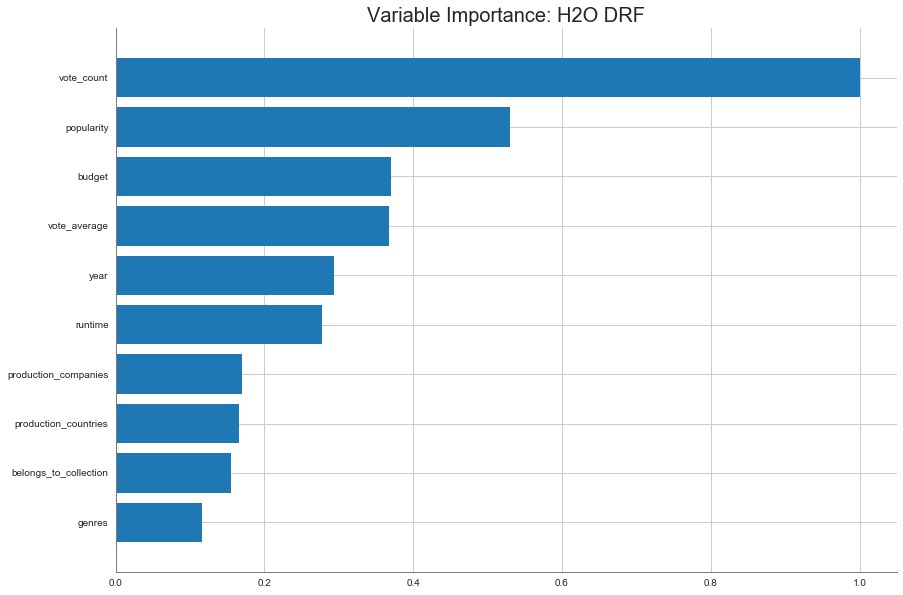

In [258]:
rf.varimp_plot()

**The model considers vote count, popularity budget and vote average mainly for the prediction.**

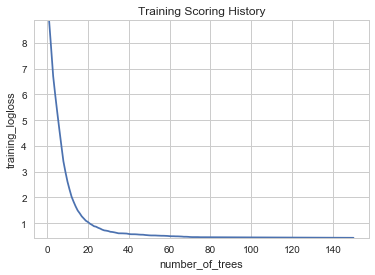

In [259]:
rf.plot()

**After 25 number of trees, there is no significant decrease and hence we can stop at 25 number of trees.**

### Deep Learning Estimator

In [276]:
dl_fit = H2ODeepLearningEstimator(model_id='dl_fit2', 
                                   epochs=100, 
                                   hidden=[100,500,500], seed=1)
dl_fit.train(x=x, y=y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [277]:
dl_perf = dl_fit.model_performance(test)

In [278]:
dl_fit.summary

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl_fit2


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.14701469177146237
RMSE: 0.3834249493335852
LogLoss: 0.45705236553252343
Mean Per-Class Error: 0.2182540462440572
AUC: 0.8663515343785192
Gini: 0.7327030687570384
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2998993095706836: 


,0,1,Error,Rate
0,2766.0,827.0,0.2302,(827.0/3593.0)
1,554.0,2080.0,0.2103,(554.0/2634.0)
Total,3320.0,2907.0,0.2218,(1381.0/6227.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2998993,0.7507670,247.0
max f2,0.1047025,0.8284884,333.0
max f0point5,0.5841541,0.7835226,144.0
max accuracy,0.4185663,0.7912317,202.0
max precision,0.9956176,0.9969419,3.0
max recall,0.0025442,1.0,398.0
max specificity,0.9997086,0.9997217,0.0
max absolute_mcc,0.4185663,0.5689469,202.0
max min_per_class_accuracy,0.3114706,0.7782840,242.0
max mean_per_class_accuracy,0.3381886,0.7817460,230.0


Gains/Lift Table: Avg response rate: 42.30 %, avg score: 38.16 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101172,0.9998318,2.3640850,2.3640850,1.0,0.9999350,1.0,0.9999350,0.0239180,0.0239180,136.4085042,136.4085042
,2,0.0200739,0.9995325,2.3259546,2.3451724,0.9838710,0.9996822,0.992,0.9998096,0.0231587,0.0470767,132.5954638,134.5172361
,3,0.0300305,0.9988836,2.3640850,2.3514429,1.0,0.9992629,0.9946524,0.9996284,0.0235383,0.0706150,136.4085042,135.1442876
,4,0.0401477,0.9977323,2.3640850,2.3546287,1.0,0.9984041,0.996,0.9993199,0.0239180,0.0945330,136.4085042,135.4628702
,5,0.0501044,0.9953418,2.3640850,2.3565078,1.0,0.9965677,0.9967949,0.9987729,0.0235383,0.1180714,136.4085042,135.6507846
,6,0.1000482,0.9661718,2.2652648,2.3109595,0.9581994,0.9833593,0.9775281,0.9910785,0.1131359,0.2312073,126.5264767,131.0959535
,7,0.1499920,0.8968331,2.2044523,2.2754951,0.9324759,0.9363651,0.9625268,0.9728602,0.1100987,0.3413060,120.4452290,127.5495131
,8,0.2000964,0.7943881,1.9624937,2.1971192,0.8301282,0.8445884,0.9293740,0.9407408,0.0983295,0.4396355,96.2493672,119.7119164
,9,0.2999839,0.5762370,1.6153314,2.0033975,0.6832797,0.6805295,0.8474304,0.8540966,0.1613516,0.6009871,61.5331419,100.3397549
,10,0.4000321,0.3930109,1.2180920,1.8069923,0.5152488,0.4849142,0.7643517,0.7617639,0.1218679,0.7228550,21.8091972,80.6992340




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.159455509311035
RMSE: 0.39931880660824753
LogLoss: 0.48765954002759165
Mean Per-Class Error: 0.23732057866320522
AUC: 0.8503466147450007
Gini: 0.7006932294900015
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22951492804180373: 


,0,1,Error,Rate
0,528.0,226.0,0.2997,(226.0/754.0)
1,103.0,461.0,0.1826,(103.0/564.0)
Total,631.0,687.0,0.2496,(329.0/1318.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2295149,0.7370104,266.0
max f2,0.0894452,0.8356764,337.0
max f0point5,0.6151244,0.7646780,133.0
max accuracy,0.6151244,0.7685888,133.0
max precision,0.9998956,1.0,0.0
max recall,0.0010502,1.0,399.0
max specificity,0.9998956,1.0,0.0
max absolute_mcc,0.6151244,0.5299678,133.0
max min_per_class_accuracy,0.3003256,0.7546419,238.0
max mean_per_class_accuracy,0.3591640,0.7626794,219.0


Gains/Lift Table: Avg response rate: 42.79 %, avg score: 38.43 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106222,0.9998921,2.3368794,2.3368794,1.0,0.9999544,1.0,0.9999544,0.0248227,0.0248227,133.6879433,133.6879433
,2,0.0204856,0.9997136,2.3368794,2.3368794,1.0,0.9998068,1.0,0.9998834,0.0230496,0.0478723,133.6879433,133.6879433
,3,0.0303490,0.9994463,2.3368794,2.3368794,1.0,0.9995738,1.0,0.9997827,0.0230496,0.0709220,133.6879433,133.6879433
,4,0.0402124,0.9986390,2.3368794,2.3368794,1.0,0.9990606,1.0,0.9996056,0.0230496,0.0939716,133.6879433,133.6879433
,5,0.0500759,0.9975911,2.3368794,2.3368794,1.0,0.9981453,1.0,0.9993180,0.0230496,0.1170213,133.6879433,133.6879433
,6,0.1001517,0.9727754,2.3014722,2.3191758,0.9848485,0.9885678,0.9924242,0.9939429,0.1152482,0.2322695,130.1472168,131.9175801
,7,0.1502276,0.8984674,2.0890286,2.2424601,0.8939394,0.9408331,0.9595960,0.9762396,0.1046099,0.3368794,108.9028584,124.2460062
,8,0.2003035,0.7812135,1.8411777,2.1421395,0.7878788,0.8456155,0.9166667,0.9435836,0.0921986,0.4290780,84.1177735,114.2139480
,9,0.3004552,0.6031124,1.5048087,1.9296959,0.6439394,0.6905876,0.8257576,0.8592516,0.1507092,0.5797872,50.4808726,92.9695895
,10,0.3998483,0.3989661,1.1238428,1.7293795,0.4809160,0.4938243,0.7400380,0.7684148,0.1117021,0.6914894,12.3842781,72.9379466



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_lift,validation_classification_error
,2018-10-21 04:07:18,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2018-10-21 04:07:27,10.706 sec,1574 obs/sec,2.3948932,1,14913.0,0.3834249,0.4570524,0.3976548,0.8663515,2.3640850,0.2217761,0.3993188,0.4876595,0.3486418,0.8503466,2.3368794,0.2496206
,2018-10-21 04:07:42,25.949 sec,2502 obs/sec,9.5453670,4,59439.0,0.3637204,0.4122566,0.4579740,0.9148583,2.3640850,0.1737594,0.4148973,0.5354176,0.2968280,0.8483937,2.3368794,0.2086495
,2018-10-21 04:07:53,36.006 sec,2710 obs/sec,14.3007869,6,89051.0,0.3065487,0.3009553,0.6149796,0.9447879,2.3640850,0.1281516,0.4009490,0.5462193,0.3433125,0.8440575,2.3368794,0.2276176
,2018-10-21 04:08:03,46.459 sec,2804 obs/sec,19.0721053,8,118762.0,0.2767378,0.2466925,0.6862225,0.9625028,2.3640850,0.1077565,0.4235225,0.6715095,0.2672880,0.8262517,2.3368794,0.2450683
,2018-10-21 04:08:14,57.040 sec,2850 obs/sec,23.7970130,10,148184.0,0.2254906,0.1676234,0.7916749,0.9839455,2.3640850,0.0685723,0.4194011,0.7600675,0.2814788,0.8384279,2.3368794,0.2458270
,2018-10-21 04:08:24,1 min 7.829 sec,2876 obs/sec,28.5508270,12,177786.0,0.2121563,0.1515479,0.8155849,0.9870348,2.3640850,0.0587763,0.4379868,1.0143207,0.2163854,0.8325844,2.3368794,0.2435508
,2018-10-21 04:08:35,1 min 18.748 sec,2889 obs/sec,33.2991810,14,207354.0,0.1824600,0.1093845,0.8635982,0.9930181,2.3640850,0.0440019,0.4543382,1.1938730,0.1567838,0.8221601,2.3368794,0.2496206
,2018-10-21 04:08:47,1 min 30.071 sec,2887 obs/sec,38.0756383,16,237097.0,0.1483230,0.0742933,0.9098633,0.9969288,2.3640850,0.0276216,0.4503591,1.2691411,0.1714891,0.8278884,2.3368794,0.2473445
,2018-10-21 04:08:58,1 min 41.379 sec,2887 obs/sec,42.8528987,18,266845.0,0.1321258,0.0599727,0.9284746,0.9979220,2.3640850,0.0240886,0.4640037,1.4293350,0.1205254,0.8085741,2.3368794,0.2564492


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
vote_count,1.0,1.0,0.0598915
popularity,0.5313342,0.5313342,0.0318224
vote_average,0.5187113,0.5187113,0.0310664
spoken_languages,0.4957989,0.4957989,0.0296941
is_Friday,0.4917549,0.4917549,0.0294519
---,---,---,---
is_Horror,0.3997705,0.3997705,0.0239429
is_Mystery,0.3973110,0.3973110,0.0237955
is_Holiday,0.3965305,0.3965305,0.0237488
is_Thriller,0.3649519,0.3649519,0.0218575



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

In [279]:
dl_fit.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2998993095706836: 


,0,1,Error,Rate
0,2766.0,827.0,0.2302,(827.0/3593.0)
1,554.0,2080.0,0.2103,(554.0/2634.0)
Total,3320.0,2907.0,0.2218,(1381.0/6227.0)


In [280]:
dl_perf.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22219403068717394: 


,0,1,Error,Rate
0,526.0,241.0,0.3142,(241.0/767.0)
1,85.0,493.0,0.1471,(85.0/578.0)
Total,611.0,734.0,0.2424,(326.0/1345.0)


In [281]:
print(dl_fit.auc())
print(dl_perf.auc())

0.8663515343785192
0.8459553466297939


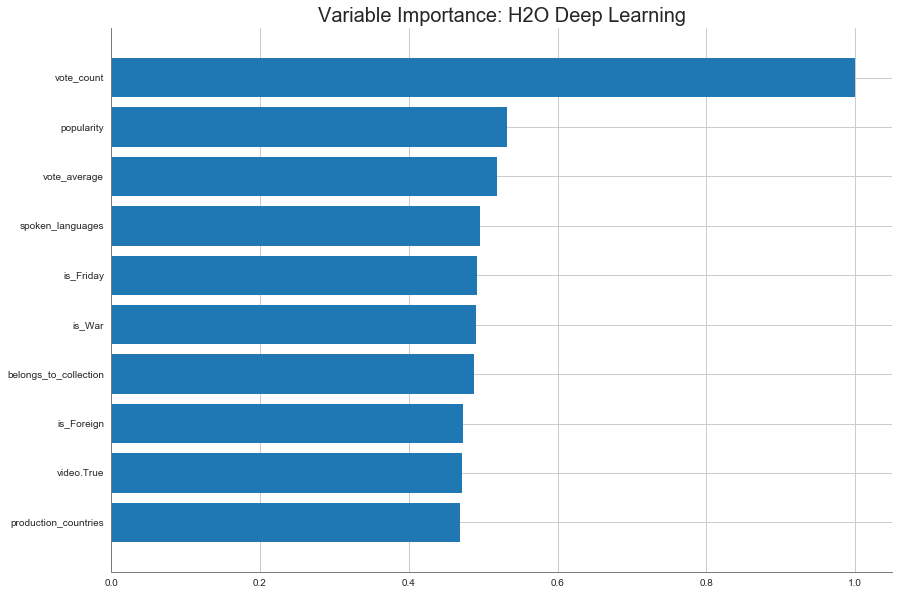

In [282]:
dl_fit.varimp_plot()

**The model uses many features and not only vote count primarily.**

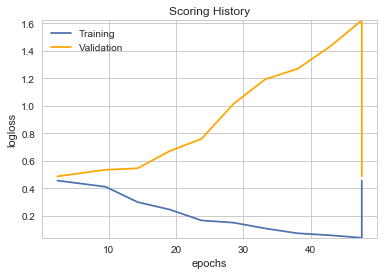

In [283]:
dl_fit.plot()

### AutoML

In [285]:
aml = H2OAutoML(seed = 1, project_name = "Movie success prediction")
aml.train(y = y, training_frame = cc)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [286]:
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_0_AutoML_20181021_041121,0.889554,0.415689,0.197133,0.364421,0.132802
GBM_grid_0_AutoML_20181021_041121_model_0,0.888569,0.412045,0.195204,0.363574,0.132186
StackedEnsemble_BestOfFamily_0_AutoML_20181021_041121,0.888465,0.417227,0.197169,0.365032,0.133248
GBM_grid_0_AutoML_20181021_041121_model_4,0.887768,0.413163,0.195602,0.364485,0.13285
GBM_grid_0_AutoML_20181021_041121_model_19,0.887536,0.413693,0.198701,0.364412,0.132796
GBM_grid_0_AutoML_20181021_041121_model_1,0.886864,0.415091,0.200753,0.365904,0.133886
GBM_grid_0_AutoML_20181021_041121_model_13,0.885596,0.437809,0.201035,0.371597,0.138084
GBM_grid_0_AutoML_20181021_041121_model_18,0.885215,0.418745,0.200023,0.366764,0.134516
GBM_grid_0_AutoML_20181021_041121_model_2,0.88509,0.419482,0.198419,0.367522,0.135072
GBM_grid_0_AutoML_20181021_041121_model_10,0.884925,0.419495,0.200399,0.367962,0.135396


In [287]:
pred = aml.predict(test)
pred

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.878094,0.121906
1,0.0653312,0.934669
0,0.917877,0.0821228
1,0.517671,0.482329
1,0.0470625,0.952938
1,0.572792,0.427208
0,0.924601,0.0753994
0,0.699353,0.300647
0,0.765669,0.234331
0,0.665096,0.334904


In [288]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08317341305323199
RMSE: 0.2883980115278744
LogLoss: 0.2877138824055672
Null degrees of freedom: 1344
Residual degrees of freedom: 1328
Null deviance: 1838.0429786021873
Residual deviance: 773.9503436709758
AIC: 807.9503436709758
AUC: 0.9580308847214014
Gini: 0.9160617694428028
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3311251086297457: 


,0,1,Error,Rate
0,662.0,105.0,0.1369,(105.0/767.0)
1,47.0,531.0,0.0813,(47.0/578.0)
Total,709.0,636.0,0.113,(152.0/1345.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3311251,0.8747941,234.0
max f2,0.2692568,0.9093937,257.0
max f0point5,0.6210952,0.9024980,145.0
max accuracy,0.5328562,0.8899628,169.0
max precision,0.9551022,1.0,0.0
max recall,0.0742241,1.0,377.0
max specificity,0.9551022,1.0,0.0
max absolute_mcc,0.5328562,0.7760184,169.0
max min_per_class_accuracy,0.3804069,0.8826597,217.0
max mean_per_class_accuracy,0.3311251,0.8908941,234.0


Gains/Lift Table: Avg response rate: 42.97 %, avg score: 43.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0104089,0.9543412,2.3269896,2.3269896,1.0,0.9548586,1.0,0.9548586,0.0242215,0.0242215,132.6989619,132.6989619
,2,0.0200743,0.9537365,2.3269896,2.3269896,1.0,0.9540500,1.0,0.9544692,0.0224913,0.0467128,132.6989619,132.6989619
,3,0.0304833,0.9528347,2.3269896,2.3269896,1.0,0.9532255,1.0,0.9540445,0.0242215,0.0709343,132.6989619,132.6989619
,4,0.0401487,0.9520239,2.3269896,2.3269896,1.0,0.9523814,1.0,0.9536442,0.0224913,0.0934256,132.6989619,132.6989619
,5,0.0505576,0.9509145,2.3269896,2.3269896,1.0,0.9515024,1.0,0.9532032,0.0242215,0.1176471,132.6989619,132.6989619
,6,0.1003717,0.9434416,2.3269896,2.3269896,1.0,0.9478962,1.0,0.9505694,0.1159170,0.2335640,132.6989619,132.6989619
,7,0.1501859,0.9266197,2.3269896,2.3269896,1.0,0.9365246,1.0,0.9459110,0.1159170,0.3494810,132.6989619,132.6989619
,8,0.2,0.8855888,2.2227961,2.3010381,0.9552239,0.9077240,0.9888476,0.9363997,0.1107266,0.4602076,122.2796054,130.1038062
,9,0.3003717,0.7565276,2.0856722,2.2290717,0.8962963,0.8332999,0.9579208,0.9019480,0.2093426,0.6695502,108.5672177,122.9071739
,10,0.4,0.4833896,1.6670970,2.0891003,0.7164179,0.6283459,0.8977695,0.8338018,0.1660900,0.8356401,66.7097041,108.9100346


In [290]:
perf.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3311251086297457: 


,0,1,Error,Rate
0,662.0,105.0,0.1369,(105.0/767.0)
1,47.0,531.0,0.0813,(47.0/578.0)
Total,709.0,636.0,0.113,(152.0/1345.0)


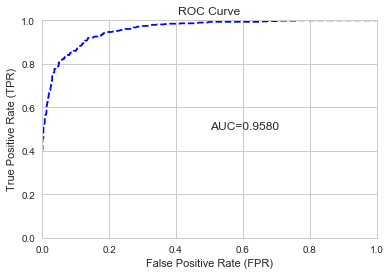

In [291]:
perf.plot()

**The model shows good enough ROC curve with less number of False Positives.**

## Multi-class Classification

**Predicting the movie language.**

In [295]:
cls = ddf[ddf['return'].notnull()]
cls.shape

(8890, 18)

**Data cleaning and Feature engineering.**

In [ ]:
cls = cls.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'revenue'], axis=1)

In [297]:
cls['return'] = cls['return'].apply(lambda x: 1 if x >=1 else 0)
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

F:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [300]:
cls['homepage'] = cls['homepage'].fillna('').apply(lambda x: 0 if x == '' else 1)
s = cls.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_cls = cls.drop('genres', axis=1).join(s)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [301]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'popularity', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'title', 'video',
       'vote_average', 'vote_count', 'return', 'year', 'day', 'month'],
      dtype='object')

In [303]:
def multi_classification_engineering(df):
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df = df.drop('homepage', axis=1)
#     df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
#     df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['May', 'Jun', 'Jul', 'Aug'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df

In [304]:
cls = multi_classification_engineering(cls)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

F:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [305]:
cls.T

,0,1,3,5,6,8,9,10,13,14,...,45379,45390,45395,45398,45399,45402,45408,45409,45412,45422
belongs_to_collection,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
budget,3e+07,6.5e+07,1.6e+07,6e+07,5.8e+07,3.5e+07,5.8e+07,6.2e+07,4.4e+07,9.8e+07,...,2,10000,1.2e+06,1.25404e+06,750000,2e+06,2e+06,800000,2e+06,5e+06
genres,3,3,3,4,2,3,3,3,2,2,...,0,1,2,2,2,1,1,2,2,4
original_language,en,en,en,en,en,en,en,en,en,en,...,uk,en,ru,fi,ru,ru,ru,en,en,ru
popularity,21.9469,17.0155,3.85949,17.9249,6.67728,5.23158,14.686,6.31844,5.092,7.28448,...,0.067263,0.072171,0.355732,0.347806,0.201582,0.52437,0.380933,0.903061,0.121844,0.039793
production_companies,1,3,1,3,7,3,2,2,2,4,...,0,1,2,1,2,1,0,0,1,0
production_countries,58,58,58,58,99,58,106,58,58,178,...,2,58,40,41,40,40,2,2,40,40
runtime,81,104,127,170,127,106,130,106,192,119,...,80,89,123,90,0,89,100,100,107,91
spoken_languages,1,2,1,2,2,1,3,1,1,2,...,1,1,1,1,1,1,0,1,1,1
video,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [306]:
cls.to_csv('movies_multi_updated.csv')

**Importing data in H2OFrame.**

In [19]:
multic = h2o.import_file('movies_multi_updated.csv')
multic

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,runtime,spoken_languages,video,vote_average,vote_count,return,year,is_Animation,is_Comedy,is_Family,is_Adventure,is_Fantasy,is_Drama,is_Romance,is_Action,is_Crime,is_Thriller,is_History,is_Science Fiction,is_Mystery,is_Horror,is_War,is_Foreign,is_Western,is_Documentary,is_Music,is_nan,is_TV Movie,is_Friday,is_Holiday
0,1,3e+07,3,en,21.9469,1,58,81,1,False,7.7,5415,1,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,6.5e+07,3,en,17.0155,3,58,104,2,False,6.9,2413,1,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1.6e+07,3,en,3.85949,1,58,127,1,False,6.1,34,1,1995,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,6e+07,4,en,17.9249,3,58,170,2,False,7.7,1886,1,1995,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,5.8e+07,2,en,6.67728,7,99,127,2,False,6.2,141,0,1995,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,3.5e+07,3,en,5.23158,3,58,106,1,False,5.5,174,1,1995,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,5.8e+07,3,en,14.686,2,106,130,3,False,6.6,1194,1,1995,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
10,0,6.2e+07,3,en,6.31844,2,58,106,1,False,6.5,199,1,1995,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
13,0,4.4e+07,2,en,5.092,2,58,192,1,False,7.1,72,0,1995,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14,0,9.8e+07,2,en,7.28448,4,178,119,2,False,5.7,137,0,1995,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
multic['original_language'] = multic['original_language'].asfactor()
multic['original_language'].levels()

[['af',
  'ar',
  'bg',
  'bm',
  'bo',
  'bs',
  'ca',
  'cn',
  'cs',
  'da',
  'de',
  'el',
  'en',
  'es',
  'et',
  'fa',
  'fi',
  'fr',
  'he',
  'hi',
  'hu',
  'id',
  'is',
  'it',
  'ja',
  'kn',
  'ko',
  'ku',
  'la',
  'lo',
  'lv',
  'ml',
  'mr',
  'nb',
  'nl',
  'no',
  'pl',
  'ps',
  'pt',
  'ro',
  'ru',
  'sl',
  'sq',
  'sr',
  'sv',
  'ta',
  'te',
  'th',
  'tr',
  'uk',
  'ur',
  'vi',
  'xx',
  'zh']]

In [21]:
splits = multic.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]
print(train.nrow)
print(valid.nrow)
print(test.nrow)

6227
1318
1345


In [22]:
y='original_language'
x = list(multic.columns)
x.remove(y)
x.remove('C1')

### Gradient Boosting Estimator

In [316]:
gbm_fit3 = H2OGradientBoostingEstimator(model_id='gbm_fit3',
                                        ntrees=500, score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='logloss',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [317]:
gbm_perf3 = gbm_fit3.model_performance(test)

In [323]:
print(gbm_fit3.r2(train=True))
print(gbm_fit3.r2(valid=True))
print(gbm_perf3.r2())

0.9995614268238657
0.9977501942174475
0.9972517938255909


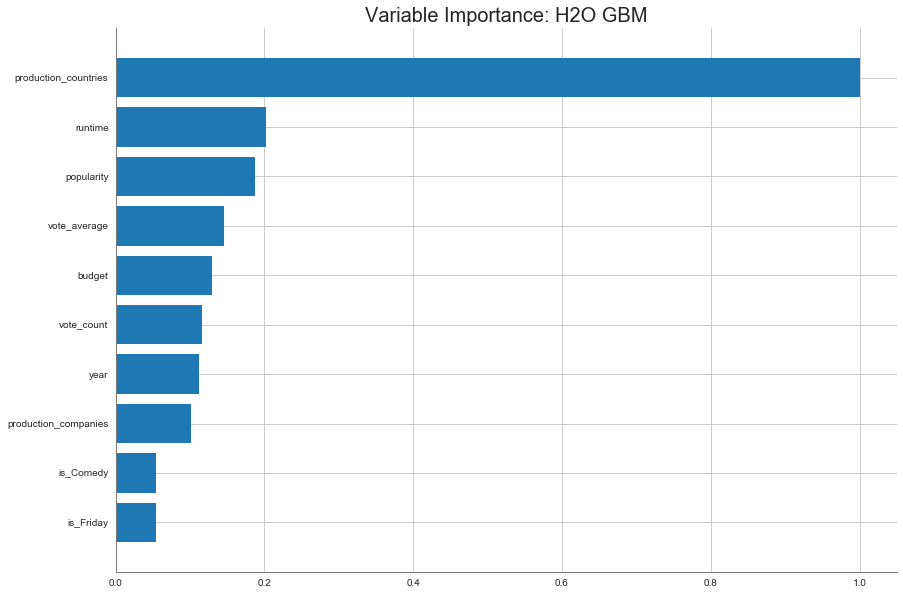

In [324]:
gbm_fit3.varimp_plot()

**The production_countries is the main feature which affects the movie language.**

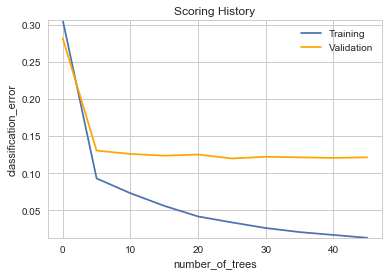

In [325]:
gbm_fit3.plot()

**The model is overfitting if number of trees is more than around 6.**

In [330]:
gbm_fit3.summary

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_fit3


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.021616752714669667
RMSE: 0.14702636741302447
LogLoss: 0.11893784224120434
Mean Per-Class Error: 0.02328223543190318
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 1
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0222222,1 / 45



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.9869921
2,0.9990364
3,0.9998394
4,0.9998394
5,0.9998394
6,0.9998394
7,0.9998394
8,0.9998394
9,0.9998394
10,0.9998394



ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.11797757393252217
RMSE: 0.3434786367920459
LogLoss: 0.5970257582849561
Mean Per-Class Error: 0.5135965200347328
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.8181818,9 / 11



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.8786039
2,0.9150227
3,0.9370258
4,0.9438543
5,0.9514416
6,0.9529591
7,0.9559939
8,0.9582701
9,0.961305
10,0.9673748


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,validation_rmse,validation_logloss,validation_classification_error
,2018-10-28 03:27:22,0.002 sec,0.0,0.9814815,3.9889840,0.3059258,0.9814815,3.9889840,0.2814871
,2018-10-28 03:27:26,3.810 sec,5.0,0.3730583,0.4910516,0.0929822,0.4073541,0.6757847,0.1305008
,2018-10-28 03:27:29,6.800 sec,10.0,0.3147375,0.3353775,0.0730689,0.3774060,0.5858919,0.1259484
,2018-10-28 03:27:32,9.917 sec,15.0,0.2738362,0.2501605,0.0560463,0.3633744,0.5488637,0.1236722
,2018-10-28 03:27:35,12.810 sec,20.0,0.2413986,0.1954020,0.0417537,0.3553845,0.5356245,0.1251897
,2018-10-28 03:27:38,15.781 sec,25.0,0.2146430,0.1614947,0.0337241,0.3505378,0.5330125,0.1198786
,2018-10-28 03:27:41,18.659 sec,30.0,0.1928145,0.1344540,0.0261763,0.3478597,0.5385820,0.1221548
,2018-10-28 03:27:44,21.946 sec,35.0,0.1741059,0.1129844,0.0207162,0.3462910,0.5495813,0.1213961
,2018-10-28 03:27:47,25.029 sec,40.0,0.1625114,0.1493612,0.0168621,0.3442314,0.5817490,0.1206373
,2018-10-28 03:27:50,27.974 sec,45.0,0.1470264,0.1189378,0.0130079,0.3434786,0.5970258,0.1213961


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
production_countries,1015.0410767,1.0,0.4170057
runtime,205.0850372,0.2020460,0.0842544
popularity,189.9186249,0.1871044,0.0780236
vote_average,148.3677368,0.1461692,0.0609534
budget,132.0816193,0.1301244,0.0542626
---,---,---,---
is_Western,2.7398245,0.0026992,0.0011256
is_Family,1.5810920,0.0015577,0.0006496
is_Music,1.1953779,0.0011777,0.0004911
video,0.0,0.0,0.0



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

### Distributed Random Forest Estimator

In [333]:
rf3 = H2ORandomForestEstimator(model_id='rf3', ntrees=150, seed=1, nfolds=5)
rf3.train(x=x, y=y, training_frame=multic)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [334]:
rf_perf3 = rf3.model_performance(test)

In [335]:
rf3.summary

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf3


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.14008357513113032
RMSE: 0.37427740398149917
LogLoss: 0.9810822054261663
Mean Per-Class Error: 0.9171403587180371
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.9692308,63 / 65



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.8664792
2,0.9148481
3,0.9323959
4,0.9418448
5,0.9493813
6,0.9559055
7,0.9602925
8,0.9634421
9,0.9669291
10,0.9706412



ModelMetricsMultinomial: drf
** Reported on cross-validation data. **

MSE: 0.14220944219576895
RMSE: 0.3771066721708447
LogLoss: 0.7805873200627564
Mean Per-Class Error: 0.930789798848562
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9846154,64 / 65



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.8640045
2,0.9128234
3,0.9309336
4,0.9444319
5,0.9510686
6,0.9571428
7,0.9622047
8,0.9664792
9,0.9691789
10,0.9713161


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8641545,0.0056763,0.8640565,0.8505876,0.8628762,0.8681015,0.8751508
err,0.1358455,0.0056763,0.1359434,0.1494124,0.1371237,0.1318985,0.1248492
err_count,241.8,13.92408,250.0,267.0,246.0,239.0,207.0
logloss,0.7796555,0.0256206,0.7817263,0.7855399,0.8330391,0.7789381,0.7190343
max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0,1.0
mean_per_class_accuracy,0.4000256,0.0382034,0.3674252,0.3940216,0.4106372,0.3334251,0.4946189
mean_per_class_error,0.5999744,0.0382034,0.6325748,0.6059784,0.5893628,0.6665749,0.5053810
mse,0.1421290,0.0028725,0.1427797,0.1475518,0.1450922,0.1388502,0.1363710
r2,0.9971105,0.0001000,0.9969761,0.9973633,0.9969805,0.9970946,0.9971380
rmse,0.3769614,0.0038137,0.377862,0.3841246,0.3809097,0.3726261,0.3692844


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2018-10-28 04:07:41,9 min 6.811 sec,0.0,nan,nan,nan
,2018-10-28 04:07:41,9 min 7.206 sec,1.0,0.4786379,7.0546243,0.2666462
,2018-10-28 04:07:42,9 min 8.104 sec,2.0,0.4534686,6.2513767,0.2316046
,2018-10-28 04:07:43,9 min 8.825 sec,3.0,0.4431976,5.8544356,0.2137428
,2018-10-28 04:07:43,9 min 9.222 sec,4.0,0.4310272,5.3251737,0.2027556
---,---,---,---,---,---,---
,2018-10-28 04:08:27,9 min 52.854 sec,118.0,0.3743200,1.0937255,0.1323960
,2018-10-28 04:08:31,9 min 57.101 sec,129.0,0.3742534,1.0384647,0.1332958
,2018-10-28 04:08:35,10 min 1.464 sec,140.0,0.3740965,1.0022808,0.1335208
,2018-10-28 04:08:39,10 min 5.622 sec,147.0,0.3743267,0.9845105,0.1337458



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
production_countries,55767.2109375,1.0,0.2246505
runtime,20504.3652344,0.3676778,0.0825990
year,20502.1757812,0.3676385,0.0825902
vote_average,20061.4179688,0.3597350,0.0808146
budget,16923.5996094,0.3034686,0.0681744
---,---,---,---
is_Family,1207.9771729,0.0216611,0.0048662
is_Music,732.7400513,0.0131393,0.0029517
is_Western,531.0295410,0.0095223,0.0021392
video,123.1621780,0.0022085,0.0004961



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

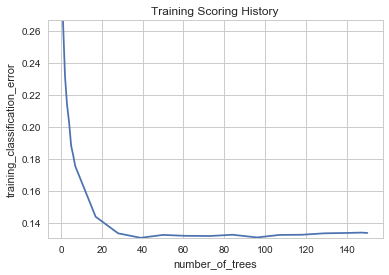

In [336]:
rf3.plot()

**There is no significant decrease in the score after 25 number of trees.**

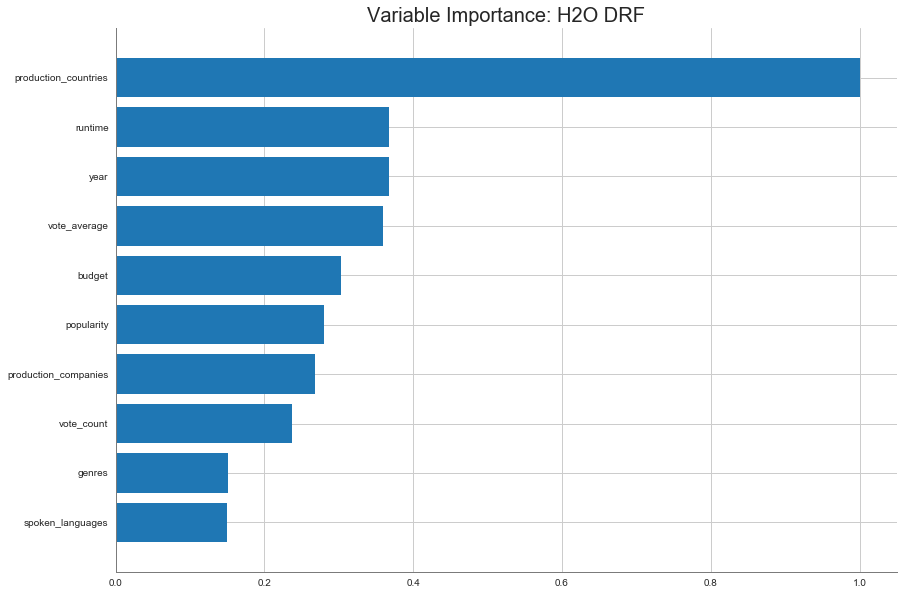

In [338]:
rf3.varimp_plot()

**Again, production countries and partially runtime features are used by the model to predict the language.**

In [339]:
rf3.r2()

0.9971614715464633

In [340]:
rf_perf3.r2()

0.9994768100221058

### Deep Learning Estimator

In [341]:
dl_fit3 = H2ODeepLearningEstimator(model_id='dl_fit3', 
                                   epochs=100, 
                                   hidden=[100,500,500], seed=1)
dl_fit3.train(x=x, y=y, training_frame=train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [342]:
dl_perf3 = dl_fit3.model_performance(test)

In [343]:
dl_fit3.r2()

0.997202806260418

In [344]:
dl_perf3.r2()

0.9964597050193326

In [345]:
dl_fit3.summary

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl_fit3


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.1378703683990166
RMSE: 0.3713089931566654
LogLoss: 0.536866565977787
Mean Per-Class Error: 0.7939834810687386
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.8888889,40 / 45



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.8655853
2,0.9140838
3,0.9386542
4,0.9537497
5,0.9635457
6,0.9714147
7,0.9755900
8,0.9797654
9,0.9826561
10,0.9847438



ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.16729475595479176
RMSE: 0.4090168162249466
LogLoss: 0.823062350646366
Mean Per-Class Error: 0.5712482715352827
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2 / 2
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9090909,10 / 11



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.8421851
2,0.8884674
3,0.9104704
4,0.9256449
5,0.9377846
6,0.9430956
7,0.9506829
8,0.9590288
9,0.961305
10,0.9635812


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_classification_error
,2018-10-28 04:12:08,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan
,2018-10-28 04:12:14,8.239 sec,1378 obs/sec,1.4496547,1,9027.0,0.3981127,0.7978273,0.9967844,0.1621969,0.4014741,0.8946917,0.9969263,0.1623672
,2018-10-28 04:12:33,27.309 sec,1487 obs/sec,5.7742091,4,35956.0,0.3713090,0.5368666,0.9972028,0.1344146,0.4090168,0.8230624,0.9968097,0.1578149
,2018-10-28 04:12:52,46.349 sec,1535 obs/sec,10.0631123,7,62663.0,0.3424477,0.4452748,0.9976207,0.1254216,0.4035875,0.9197304,0.9968939,0.1669196
,2018-10-28 04:13:17,1 min 9.953 sec,1551 obs/sec,15.7878593,11,98311.0,0.2759199,0.2728105,0.9984554,0.0843103,0.3896243,1.1378195,0.9971051,0.1562974
,2018-10-28 04:13:29,1 min 22.438 sec,1554 obs/sec,18.6609925,13,116202.0,0.2466798,0.2165291,0.9987654,0.0708206,0.3925657,1.2772937,0.9970612,0.1631259
,2018-10-28 04:13:41,1 min 34.783 sec,1558 obs/sec,21.5461699,15,134168.0,0.2291806,0.1792319,0.9989344,0.0597398,0.4018139,1.3805421,0.9969211,0.1691958
,2018-10-28 04:13:54,1 min 47.380 sec,1559 obs/sec,24.4360045,17,152163.0,0.2076911,0.1490030,0.9991248,0.0518709,0.3951197,1.4809933,0.9970228,0.1646434
,2018-10-28 04:14:07,2 min 0.251 sec,1555 obs/sec,27.3200578,19,170122.0,0.1572180,0.0836979,0.9994985,0.0266581,0.3990192,1.5307994,0.9969638,0.1691958
,2018-10-28 04:14:20,2 min 13.051 sec,1552 obs/sec,30.1885338,21,187984.0,0.1694925,0.0972405,0.9994172,0.0348482,0.3953829,1.7357840,0.9970189,0.1631259


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
popularity,1.0,1.0,0.0371489
budget,0.9588045,0.9588045,0.0356186
vote_average,0.9163028,0.9163028,0.0340397
is_Friday,0.9002489,0.9002489,0.0334433
genres,0.8806627,0.8806627,0.0327157
---,---,---,---
is_Crime,0.6291292,0.6291292,0.0233715
is_Mystery,0.6167846,0.6167846,0.0229129
video.False,0.6125461,0.6125461,0.0227554
is_Foreign,0.5534927,0.5534927,0.0205617



See the whole table with table.as_data_frame()


<bound method ModelBase.summary of >

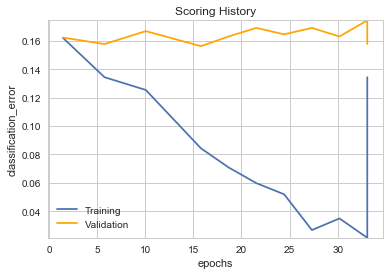

In [346]:
dl_fit3.plot()

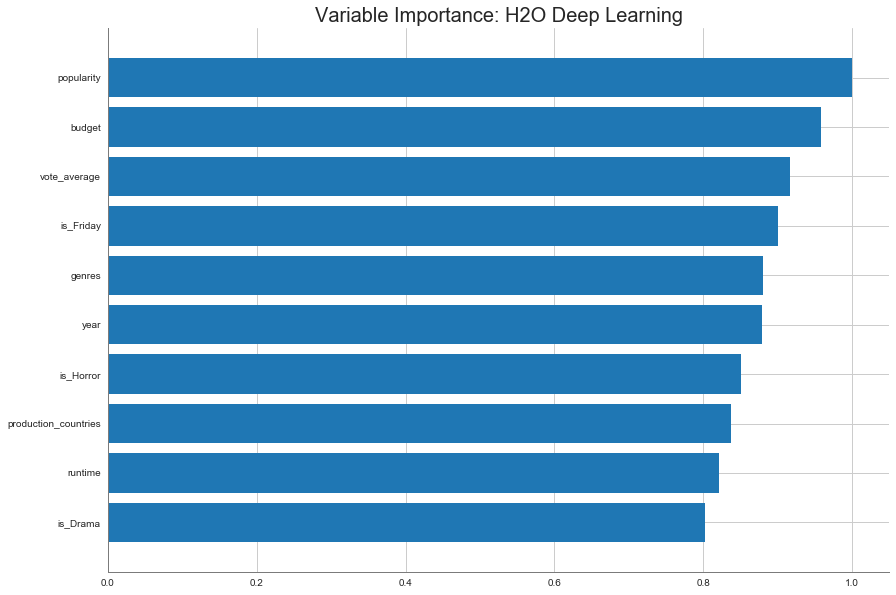

In [347]:
dl_fit3.varimp_plot()

**Based on Deep Learning, the popularity, budget and many other features have good importance in predicting the movie language.**

### AutoML

In [23]:
aml3 = H2OAutoML(max_runtime_secs=99, seed = 1, project_name = "Movie language prediction")
aml3.train(y = y, training_frame = multic)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [24]:
aml3.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
DRF_0_AutoML_20181028_225030,0.856435,1.24463,0.379664,0.144145


In [25]:
pred = aml3.predict(test)
pred

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh
en,2.18391e-05,2.62518e-05,0,3.82522e-05,0,0,0.00013952,0.0147774,4.39065e-05,2.29106e-05,0,1.81123e-05,0.868909,0,3.08229e-05,3.26564e-05,0,0.0620649,1.41943e-05,0,1.11705e-05,8.71668e-05,5.07595e-06,2.5153e-05,0,0,0.0177452,6.36727e-05,0,1.06889e-05,1.30972e-05,2.49182e-05,9.24549e-06,1.87483e-05,0.017777,2.09198e-05,9.41234e-06,3.01067e-05,4.54339e-06,0,0,1.52755e-05,0.000111609,2.36303e-05,7.6074e-06,1.42369e-05,4.35589e-06,0,9.32287e-06,1.74708e-05,2.13833e-05,9.24549e-06,3.68852e-05,0.0177328
en,3.63299e-05,0.000133589,0,4.41891e-05,0,0,3.46443e-05,8.7798e-06,4.94557e-05,5.23852e-05,0,2.69882e-05,0.998702,0,0.000162787,3.67838e-05,0,0,1.59883e-05,0,1.25823e-05,0.000111564,5.71749e-06,2.8332e-05,0,0,1.38661e-05,8.10635e-06,0,0,1.47525e-05,2.80675e-05,1.0414e-05,1.48838e-05,4.9751e-05,2.35638e-05,1.06019e-05,2.16352e-05,5.11761e-06,0,0,1.72061e-05,2.00585e-05,2.66169e-05,8.56887e-06,1.60362e-05,0,0,1.05012e-05,0.00011658,2.40859e-05,1.0414e-05,7.10359e-05,1.57648e-05
en,4.39518e-05,4.85428e-05,0,4.75503e-06,0,0,0.000243162,0,2.00839e-05,2.58086e-05,0,3.13427e-05,0.998793,0,6.41365e-05,3.603e-05,0,0,0.000178356,0,1.25835e-05,1.65235e-05,5.71801e-06,2.83346e-05,0,0,1.38673e-05,6.99435e-06,1.3355e-05,1.97716e-05,1.47539e-05,2.80701e-05,0,2.11198e-05,2.40274e-05,2.35659e-05,1.06029e-05,2.16372e-05,5.11808e-06,0,0,2.10774e-05,0,2.66193e-05,8.56965e-06,7.49001e-06,4.90687e-06,0,1.05021e-05,4.68346e-05,2.40881e-05,3.4984e-05,5.95115e-05,0
en,9.22203e-05,5.25359e-05,0,3.64216e-05,0,0,2.94864e-05,8.25606e-06,1.88841e-05,0,0,2.94703e-05,0.939126,0,9.14347e-05,1.93231e-05,0,0.00375651,8.1292e-06,0,1.18317e-05,1.55364e-05,5.37642e-06,0,0,0,1.30389e-05,1.41993e-05,0,1.85904e-05,1.38725e-05,2.63932e-05,9.79277e-06,0,0.0375978,1.70389e-05,0,2.03446e-05,4.81233e-06,0,0,1.61797e-05,0,2.50291e-05,0.0187906,7.04257e-06,4.61374e-06,0,9.87474e-06,7.50401e-06,2.26491e-05,9.79277e-06,5.43141e-05,1.48244e-05
en,0.000202167,0.000286468,0,3.93414e-05,0,0,3.08437e-05,7.81662e-06,0.000111161,4.66383e-05,0,2.40275e-05,0.889141,0,0.000151094,3.27484e-05,0,0,1.42343e-05,0,8.09385e-05,0.000347344,4.79404e-05,2.52239e-05,0.0711313,0,1.23449e-05,7.21705e-06,0,0,0.000124215,2.49884e-05,0.000472366,0,0.000176604,2.09788e-05,0,0.000431219,0.0177874,0.000135747,0,0.000154792,6.63787e-05,0.000302313,7.62884e-06,1.4277e-05,0.000500912,0,9.34915e-06,0,7.95441e-05,9.14726e-05,6.3243e-05,0.0177969
en,3.14223e-05,3.08074e-05,0,7.92075e-05,0,0,9.31746e-05,2.66625e-05,2.09226e-05,2.68864e-05,0,3.26516e-05,0.915643,0,3.61717e-05,5.44489e-05,0,0.0208101,9.00674e-06,0,3.97714e-05,1.72135e-05,5.95679e-06,0.0416496,0,0,1.44464e-05,2.06177e-05,4.0314e-06,3.3141e-05,1.537e-05,2.92423e-05,0,6.49503e-06,3.63266e-05,2.45501e-05,1.10457e-05,6.19937e-05,5.33181e-06,0,0.0208101,2.19577e-05,0,2.77309e-05,8.40541e-05,7.8028e-06,5.11178e-06,0,1.09407e-05,4.87904e-05,2.5094e-05,3.64449e-05,5.26535e-05,0
en,1.23259e-05,0.000107318,0,4.75583e-06,0,0,3.46533e-05,0,2.00873e-05,2.5813e-05,0,9.86181e-05,0.998962,0,0.000100296,5.22751e-05,0,0,8.64715e-06,0,1.25856e-05,1.28278e-05,5.71898e-06,2.83393e-05,0,0,1.38697e-05,2.2684e-05,3.87045e-06,1.97749e-05,1.47564e-05,2.80748e-05,0,2.11234e-05,3.89935e-05,2.35699e-05,1.06047e-05,2.16408e-05,5.11894e-06,0,0,2.1081e-05,7.84422e-06,2.66238e-05,8.5711e-06,1.60404e-05,4.9077e-06,0,1.05039e-05,0.000128463,2.40922e-05,0,4.15578e-05,0
en,4.61313e-05,5.47965e-05,0,0.000100729,0,0,7.95393e-05,2.51003e-05,1.96967e-05,0,0,3.07384e-05,0.979211,0,0.000125996,3.53354e-05,0,0,8.47901e-06,0,3.74411e-05,1.62049e-05,5.60777e-06,0,0,0,1.36e-05,3.75693e-05,6.89529e-05,1.93904e-05,1.44694e-05,2.75289e-05,0,6.00172e-05,0.01962,1.77721e-05,1.03985e-05,0.000144111,0,0,0,2.06711e-05,0,2.61061e-05,8.40444e-06,7.34561e-06,4.81227e-06,0,1.02997e-05,1.16221e-05,2.36237e-05,0,5.66513e-05,0
en,4.31258e-05,2.9

In [26]:
perf3 = aml3.leader.model_performance(test)
perf3


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.0463867781372202
RMSE: 0.21537589962022258
LogLoss: 0.30469113508745826
Mean Per-Class Error: 0.09868298610128674
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.1111111,1 / 9



See the whole table with table.as_data_frame()
Top-10 Hit Ratios: 


k,hit_ratio
1,0.9739777
2,0.9814126
3,0.9851301
4,0.9866172
5,0.9888476
6,0.9888476
7,0.9903346
8,0.9918216
9,0.9918216
10,0.9933087


In [27]:
perf3.confusion_matrix()

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



af,ar,bg,bm,bo,bs,ca,cn,cs,da,de,el,en,es,et,fa,fi,fr,he,hi,hu,id,is,it,ja,kn,ko,ku,la,lo,lv,ml,mr,nb,nl,no,pl,ps,pt,ro,ru,sl,sq,sr,sv,ta,te,th,tr,uk,ur,vi,xx,zh,Error,Rate
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0 / 1
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0 / 0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.1111111,1 / 9



See the whole table with table.as_data_frame()


In [28]:
perf3.r2()

0.9990042538805612

**The confusion matrix of AutoML in multi-class classification scenario doesn't look proper because it gives every possible combination of each feature and hence it looks bit shaby and unreadable.**

## Conclusion
**The Deep Learning model is not giving good results as compared to Gradient Boosting and Random forest estimators. Both GBM and RF are giving almost equal accuracies and r2 in regression, binary and multi-class classification. H2OAutoML gives a leaderboard of which the leader everytime generally is a GBM all models stacked or Ensemble of all the models. However, for multiclass classification proble, AutoML was creating a issue of not stopping even with max_runtime_sec parameter specified and hence i had to just limit it to 100 sec.**